# Student Stress Factors

Data: [Student Stress Factors: A Comprehensive Analysis
](https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis)

> The features are selected scientifically considering 5 major factors, they are Psychological, Physiological, Social, Environmental, and Academic Factors.
> **Psychological Factors** => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression'
> **Physiological Factors** => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'
> **Environmental Factors** => 'noise_level', 'living_conditions', 'safety', 'basic_needs'
> **Academic Factors** => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'
> **Social Factor** => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

## Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

In [14]:
sns.set_context('paper')

## Factor Analysis

In [15]:
data = pd.read_csv('data/StressLevelDataset.csv')
data

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2                12           18                      1          14         2   
3                16           12                      1          15         4   
4                16           28                      0           7         2   
...             ...          ...                    ...         ...       ...   
1095             11           17                      0          14         3   
1096              9           12                      0           8         0   
1097              4           26                      0           3         1   
1098             21            0                      1          19         5   
1099             18            6                      1          15         3   

      blood_pressure  sleep_quality  breathing_problem  noise_level  \
0                  1              2                  4            2   
1                  3              1                  4            3   
2                  1              2                  2            2   
3                  3              1                  3            4   
4                  3              5                  1            3   
...              ...            ...                ...          ...   
1095               1              3                  2            2   
1096               3              0                  0            0   
1097               2              5                  2            2   
1098               3              1                  4            3   
1099               3              0                  3            3   

      living_conditions  ...  basic_needs  academic_performance  study_load  \
0                     3  ...            2                     3           2   
1                     1  ...            2                     1           4   
2                     2  ...            2                     2           3   
3                     2  ...            2                     2           4   
4                     2  ...            3                     4           3   
...                 ...  ...          ...                   ...         ...   
1095                  2  ...            3                     2           2   
1096                  1  ...            4                     0           1   
1097                  3  ...            4                     5           1   
1098                  1  ...            1                     2           5   
1099                  0  ...            3                     3           4   

      teacher_student_relationship  future_career_concerns  social_support  \
0                                3                       3               2   
1                                1                       5               1   
2                                3                       2               2   
3                                1                       4               1   
4                                1                       2               1   
...                            ...                     ...             ...   
1095                             2                       3               3   
1096                             1                       1               1   
1097                             4                       1               3   
1098                             1                       4               1   
1099                             3                       3               1   

      peer_pressure  extracurricular_activities  bullying  stress_level  
0                 3                           3         2             1  
1                 4                           5         5             2  
2                 3                           2         2             1 

In [16]:
psychological_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physiological_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
environmental_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [18]:
data.describe()

anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000           0.000000   
25%       1.000000        1.000000       1.000000           2.000000   
50%       3.000000        2.000000       2.500000           3.000000   
75%       3.000000        3.000000       4.000000           4.000000   
max       5.000000        3.000000       5.000000           5.000000   

       noise_level  living_conditions  ...  basic_needs  academic_performance  \
count  1100.000000        1100.000000  ...  1100.000000           1100.000000   
mean      2.649091           2.518182  ...     2.772727              2.772727   
std       1.328127           1.119208  ...     1.433761              1.414594   
min       0.000000           0.000000  ...     0.000000              0.000000   
25%       2.000000           2.000000  ...     2.000000              2.000000   
50%       3.000000           2.000000  ...     3.000000              2.000000   
75%       3.000000           3.000000  ...     4.000000              4.000000   
max       5.000000           5.000000  ...     5.000000              5.000000   

        study_load  teacher_student_relationship  future_career_concerns  \
count  1100.000000                   1100.000000             1100.000000   
mean      2.621818                      2.648182                2.649091   
std       1.315781                      1.384579                1.529375   
min       0.000000                      0.000000                0.000000   
25%       2.000000                      2.000000                1.000000   
50%       2.000000                      2.000000                2.000000   
75%       3.000000                      4.000000                4.000000   
max       5.000000                      5.000000                5.000000   

       social_support  peer_pressure  extracurricular_activities     bullying  \
count     1100.000000    1100.000000                 1100.000000  1100.000000   
mean         1.881818       2.734545                    2.767273     2.617273   
std          1.047826       1.425265                    1.417562     1.530958   
min          0.000000       0.000000                    0.000000     0.000000   
25%          1.000000       2.000000                    2.000000     1.000000   
50%          2.000000       2.000000                    2.500000     3.000000   
75%          3.000000       4.000000                    4.000000     4.000000   
max          3.000000       5.000000                    5.000000     5.000000   

       stress_level  
count   1100.000000  
mean       0.996364  
std        0.821673  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000  

[8 rows x 21 columns]

In [19]:
data.corr()

anxiety_level  self_esteem  \
anxiety_level                      1.000000    -0.672745   
self_esteem                       -0.672745     1.000000   
mental_health_history              0.634450    -0.603502   
depression                         0.694340    -0.699602   
headache                           0.632738    -0.626058   
blood_pressure                     0.330867    -0.514692   
sleep_quality                     -0.710292     0.662693   
breathing_problem                  0.561654    -0.510514   
noise_level                        0.608624    -0.571169   
living_conditions                 -0.568434     0.550535   
safety                            -0.651220     0.643981   
basic_needs                       -0.637079     0.631212   
academic_performance              -0.649601     0.639045   
study_load                         0.586064    -0.575112   
teacher_student_relationship      -0.663176     0.652934   
future_career_concerns             0.717016    -0.712520   
social_support                    -0.569748     0.679211   
peer_pressure                      0.642910    -0.607118   
extracurricular_activities         0.641022    -0.641202   
bullying                           0.709982    -0.640737   
stress_level                       0.736795    -0.756195   

                              mental_health_history  depression  headache  \
anxiety_level                              0.634450    0.694340  0.632738   
self_esteem                               -0.603502   -0.699602 -0.626058   
mental_health_history                      1.000000    0.615882  0.604826   
depression                                 0.615882    1.000000  0.657700   
headache                                   0.604826    0.657700  1.000000   
blood_pressure                             0.295617    0.436084  0.361986   
sleep_quality                             -0.614146   -0.693161 -0.638771   
breathing_problem                          0.464347    0.522540  0.461719   
noise_level                                0.515290    0.566250  0.543557   
living_conditions                         -0.508525   -0.530351 -0.532825   
safety                                    -0.546731   -0.625857 -0.589136   
basic_needs                               -0.601196   -0.608776 -0.623199   
academic_performance                      -0.586193   -0.633174 -0.622059   
study_load                                 0.532267    0.602498  0.542890   
teacher_student_relationship              -0.587728   -0.673853 -0.625928   
future_career_concerns                     0.625909    0.706561  0.679307   
social_support                            -0.482560   -0.617972 -0.572988   
peer_pressure                              0.580602    0.635544  0.622581   
extracurricular_activities                 0.554576    0.648551  0.582562   
bullying                                   0.624366    0.665790  0.609775   
stress_level                               0.648644    0.734379  0.713484   

                              blood_pressure  sleep_quality  \
anxiety_level                       0.330867      -0.710292   
self_esteem                        -0.514692       0.662693   
mental_health_history               0.295617      -0.614146   
depression                          0.436084      -0.693161   
headache                            0.361986      -0.638771   
blood_pressure                      1.000000      -0.300323   
sleep_quality                      -0.300323       1.000000   
breathing_problem                   0.162308      -0.541687   
noise_level                         0.352744      -0.576645   
living_conditions                  -0.274686       0.535462   
safety                             -0.288354       0.657686   
basic_needs                        -0.280590       0.620955   
academic_performance               -0.262785       0.671326   
study_load                          0.348964      -0.551775   
teacher_student_relationship       -0.352123       0.677569   
future

[]

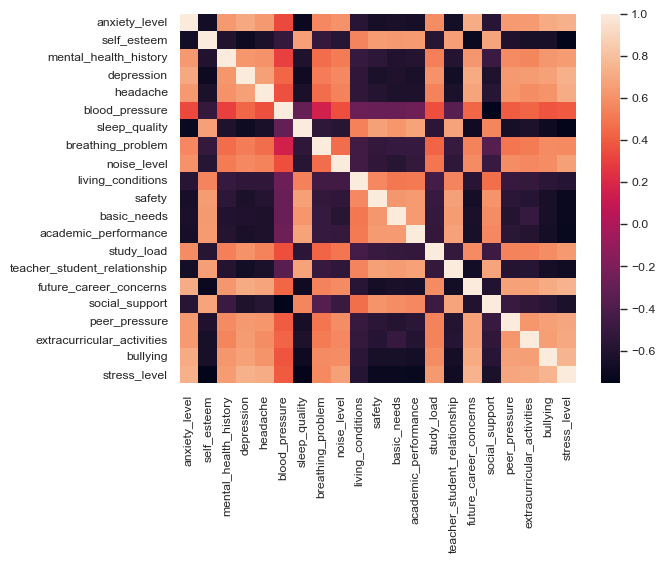

In [20]:
sns.heatmap(data.corr())
plt.plot()

[]

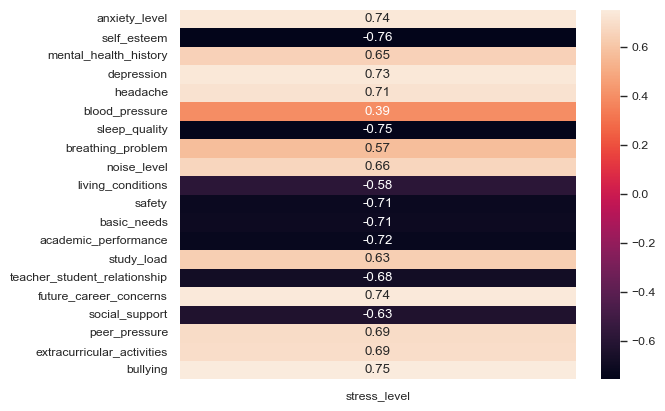

In [21]:
sns.heatmap(data.corr().iloc[:-1,-1:], annot = True)
plt.plot()

In [22]:
stress = data['stress_level']

In [23]:
data = data.drop(columns=['stress_level'], axis=1)

In [24]:
scaled_data = StandardScaler().fit_transform(data)
scaled_data

array([[ 0.48020782,  0.24861241, -0.98555881, ...,  0.18633396,
         0.16424895, -0.40337716],
       [ 0.64374608, -1.09358954,  1.0146528 , ...,  0.88827696,
         1.57576339,  1.5570715 ],
       [ 0.15313129,  0.02491208,  1.0146528 , ...,  0.18633396,
        -0.54150826, -0.40337716],
       ...,
       [-1.15517484,  0.91971338, -0.98555881, ..., -1.21755204,
        -0.54150826, -1.05686005],
       [ 1.62497568, -1.98839084,  1.0146528 , ...,  0.88827696,
         0.87000617,  0.90358861],
       [ 1.13436088, -1.31728986,  1.0146528 , ...,  1.59021996,
        -1.24726548,  0.90358861]])

### 5 Factors

In [25]:
factor_analysis = FactorAnalysis(5, rotation='varimax', random_state=13)

In [26]:
factor_analysis.fit(data)

FactorAnalysis(n_components=5, random_state=13, rotation='varimax')

In [27]:
factor_analysis.components_

array([[ 4.04066023e+00, -8.87858200e+00,  2.97443329e-01,
         5.24441073e+00,  8.68581759e-01,  4.28683124e-01,
        -1.00912264e+00,  7.04085321e-01,  7.48681739e-01,
        -6.08678275e-01, -8.93482788e-01, -8.92950677e-01,
        -8.90919293e-01,  7.45632040e-01, -8.89239900e-01,
         1.07610657e+00, -7.05994520e-01,  8.52298708e-01,
         8.97450418e-01,  9.65262023e-01],
       [-1.60066638e+00,  3.03042118e-01, -1.32875087e-01,
        -5.54112999e+00, -4.33647517e-01, -1.07600789e-01,
         4.86579956e-01, -3.11122230e-01, -2.99200575e-01,
         2.19984478e-01,  3.36401244e-01,  3.27116609e-01,
         3.61753099e-01, -3.68062561e-01,  4.16680690e-01,
        -4.40956034e-01,  2.19494442e-01, -4.15007106e-01,
        -3.96294868e-01, -4.49461239e-01],
       [-4.17995922e+00,  9.93903111e-02, -1.25306999e-01,
        -6.52563065e-01, -2.96600009e-01,  4.94781378e-02,
         4.44233202e-01, -3.51045361e-01, -3.44927368e-01,
         2.56402107e-01,  3.4

In [28]:
factor_analysis.noise_variance_

array([1.02421732, 1.00017231, 0.11223466, 1.01563737, 0.78205473,
       0.14825112, 0.73653372, 1.08967466, 0.91178921, 0.69274032,
       0.72076737, 0.76996431, 0.70419514, 0.92991003, 0.60971101,
       0.69180555, 0.15793036, 0.87725652, 0.87257514, 0.72356473])

In [29]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  factor_4
anxiety_level                 4.040660 -1.600666 -4.179959  0.002506  0.025634
self_esteem                  -8.878582  0.303042  0.099390 -0.010111 -0.039436
mental_health_history         0.297443 -0.132875 -0.125307 -0.016023  0.125102
depression                    5.244411 -5.541130 -0.652563  0.004430  0.021662
headache                      0.868582 -0.433648 -0.296600  0.083762  0.407731
blood_pressure                0.428683 -0.107601  0.049478  0.584677 -0.086258
sleep_quality                -1.009123  0.486580  0.444233  0.060900 -0.449016
breathing_problem             0.704085 -0.311122 -0.351045 -0.182051  0.346641
noise_level                   0.748682 -0.299201 -0.344927  0.079076  0.272190
living_conditions            -0.608678  0.219984  0.256402 -0.008771 -0.271825
safety                       -0.893483  0.336401  0.341836 -0.052153 -0.471280
basic_needs                  -0.892951  0.327117  0.342255 -0.027548 -0.511128
academic_performance         -0.890919  0.361753  0.338218  0.031500 -0.508727
study_load                    0.745632 -0.368063 -0.267425  0.035867  0.188452
teacher_student_relationship -0.889240  0.416681  0.317410 -0.160460 -0.464324
future_career_concerns        1.076107 -0.440956 -0.394689  0.094995  0.355630
social_support               -0.705995  0.219494  0.102108 -0.596859 -0.159614
peer_pressure                 0.852299 -0.415007 -0.360308  0.058695  0.347900
extracurricular_activities    0.897450 -0.396295 -0.313145  0.092596  0.255672
bullying                      0.965262 -0.449461 -0.484634  0.062816  0.496104

[]

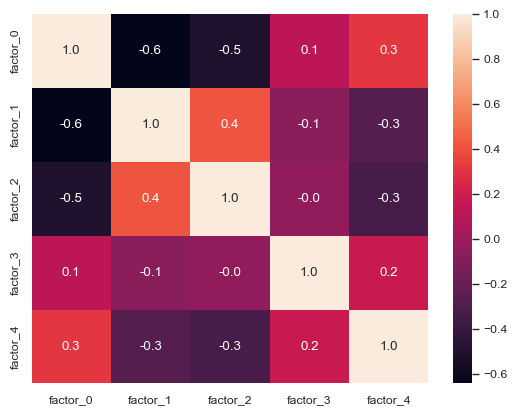

In [30]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

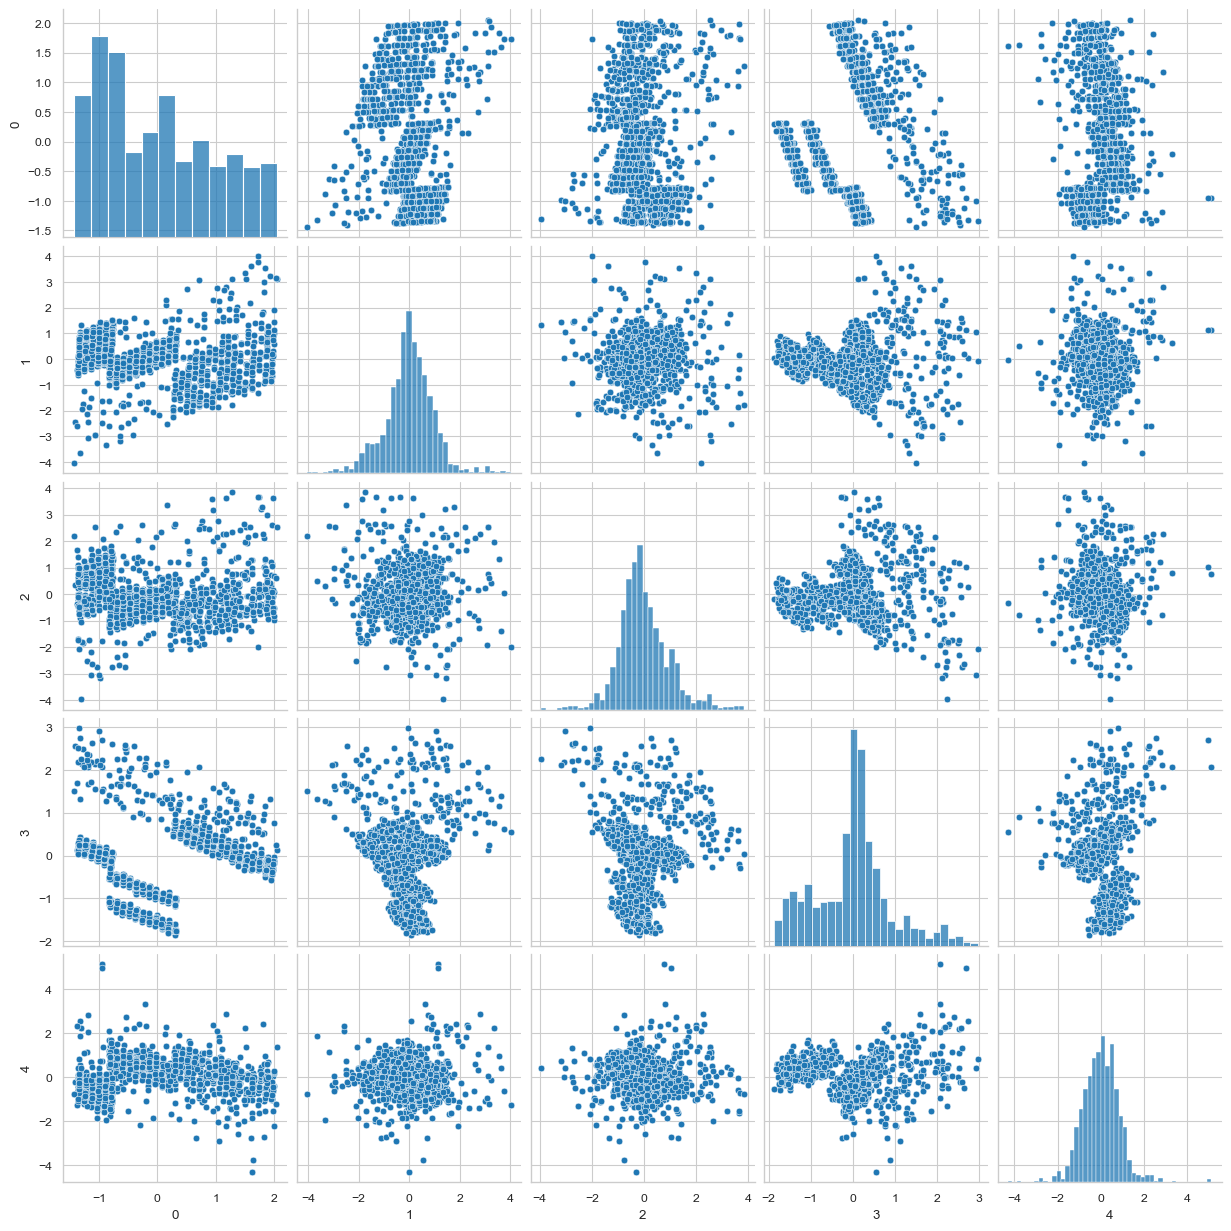

In [31]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

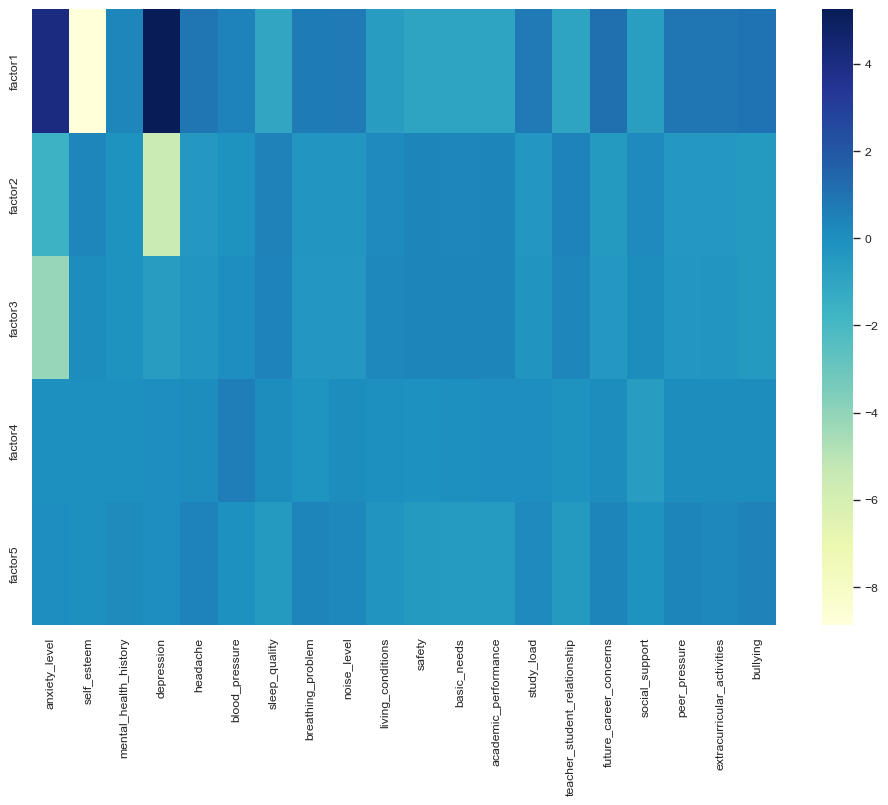

In [32]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 6)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 5 Factors with Standardization 

In [33]:
factor_analysis = FactorAnalysis(5, rotation='varimax', random_state=13)

In [34]:
factor_analysis.fit(scaled_data)

FactorAnalysis(n_components=5, random_state=13, rotation='varimax')

In [35]:
factor_analysis.components_

array([[ 4.97369513e-01, -4.63415945e-01,  4.03967568e-01,
         4.55341143e-01,  4.67897854e-01,  2.34032373e-02,
        -5.29501638e-01,  3.95900732e-01,  3.31606481e-01,
        -4.30910281e-01, -6.54234376e-01, -5.93334961e-01,
        -6.11923663e-01,  3.11309817e-01, -6.75595349e-01,
         4.41870094e-01, -5.61096090e-01,  2.82057138e-01,
         3.13562472e-01,  4.58428187e-01],
       [ 2.23722160e-01, -4.30684609e-01,  1.89762110e-01,
         3.38057432e-01,  2.71163815e-01,  9.23491618e-01,
        -1.91887076e-01,  6.13298708e-02,  2.60974377e-01,
        -1.89634146e-01, -2.17015748e-01, -1.98359565e-01,
        -1.73978369e-01,  2.58084078e-01, -2.88932053e-01,
         3.22256243e-01, -7.59639941e-01,  2.77725826e-01,
         3.21070322e-01,  2.53781078e-01],
       [-6.30139327e-01,  5.36257457e-01, -5.59913167e-01,
        -6.07372680e-01, -5.35747905e-01, -1.81868474e-01,
         6.04419774e-01, -5.37906197e-01, -5.37489310e-01,
         4.74976617e-01,  4.4

In [36]:
factor_analysis.noise_variance_

array([0.28866004, 0.30236169, 0.41588579, 0.28623876, 0.36647709,
       0.1190191 , 0.30279507, 0.52320254, 0.46943983, 0.55206297,
       0.32088473, 0.27389994, 0.34794912, 0.50405711, 0.28166546,
       0.27436477, 0.07809792, 0.34502984, 0.33874511, 0.28323223])

In [37]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  factor_4
anxiety_level                 0.497370  0.223722 -0.630139  0.125216 -0.019856
self_esteem                  -0.463416 -0.430685  0.536257 -0.080766 -0.035767
mental_health_history         0.403968  0.189762 -0.559913  0.255384  0.120383
depression                    0.455341  0.338057 -0.607373  0.046565  0.143489
headache                      0.467898  0.271164 -0.535748  0.150244  0.187926
blood_pressure                0.023403  0.923492 -0.181868  0.030603  0.004965
sleep_quality                -0.529502 -0.191887  0.604420 -0.103950 -0.027136
breathing_problem             0.395901  0.061330 -0.537906  0.072021 -0.167310
noise_level                   0.331606  0.260974 -0.537489  0.235331 -0.059354
living_conditions            -0.430910 -0.189634  0.474977 -0.041332  0.006742
safety                       -0.654234 -0.217016  0.444284 -0.025814  0.099485
basic_needs                  -0.593335 -0.198360  0.413576 -0.402830  0.002375
academic_performance         -0.611924 -0.173978  0.485701 -0.098986 -0.041262
study_load                    0.311310  0.258084 -0.558300  0.100041  0.070638
teacher_student_relationship -0.675595 -0.288932  0.413606 -0.067293 -0.060294
future_career_concerns        0.441870  0.322256 -0.646396  0.089600  0.042712
social_support               -0.561096 -0.759640  0.169132 -0.072307 -0.000880
peer_pressure                 0.282057  0.277726 -0.676742  0.188809  0.019476
extracurricular_activities    0.313562  0.321070 -0.669644 -0.021488 -0.040983
bullying                      0.458428  0.253781 -0.642277  0.127663 -0.120519

[]

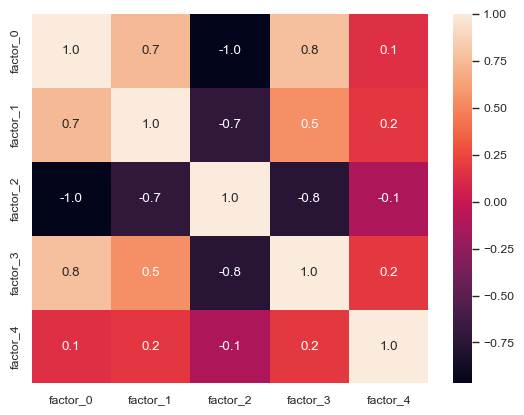

In [38]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

D:\Work\Uni\FMI-multivariate-statistical-modeling\Stress-Factors\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FactorAnalysis was fitted without feature names
  warnings.warn(


[]

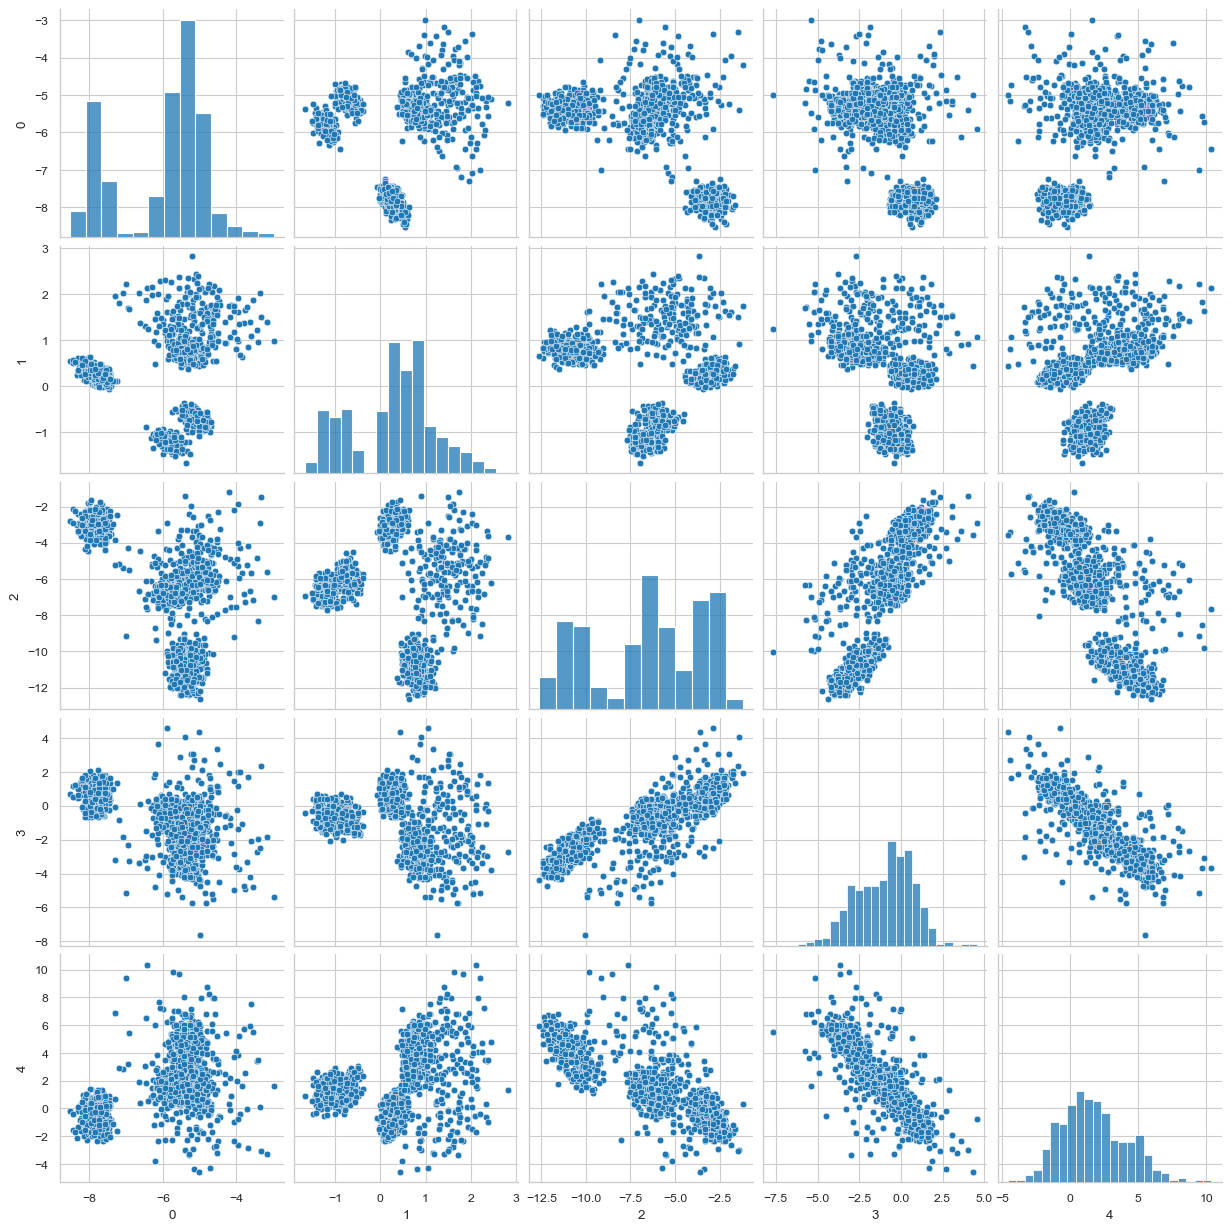

In [39]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))
plt.plot()

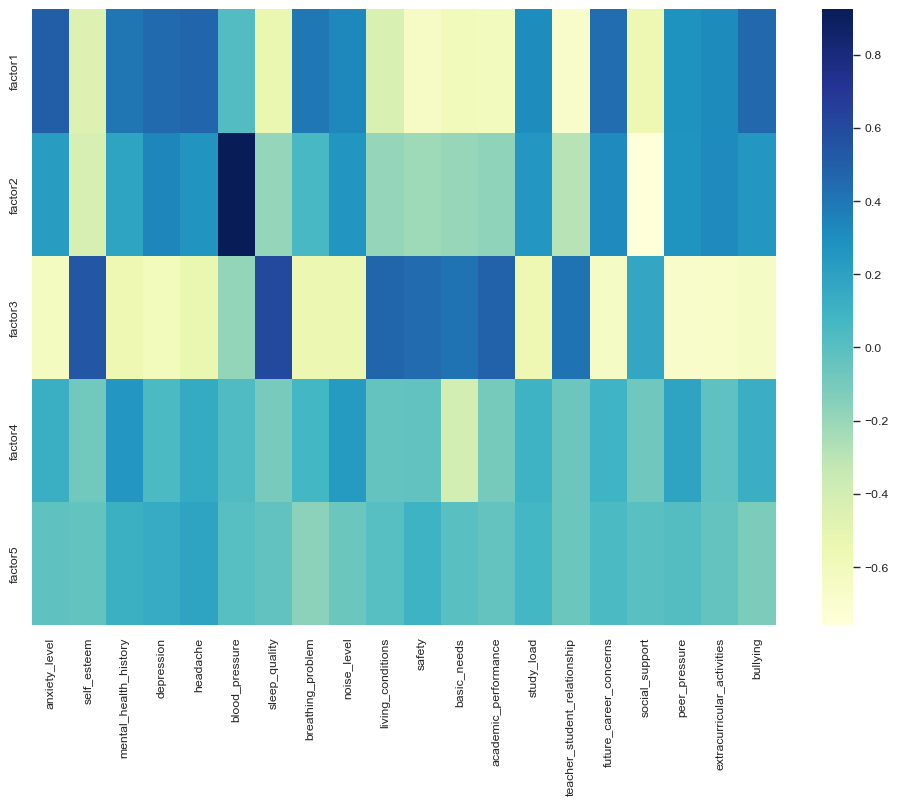

In [40]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 6)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 4 Factors

In [41]:
factor_analysis = FactorAnalysis(4, random_state=13)

In [42]:
factor_analysis.fit(data)

FactorAnalysis(n_components=4, random_state=13)

In [43]:
factor_analysis.components_

array([[ 5.11473076, -8.22366216,  0.35018373,  6.85910917,  1.02805176,
         0.42039152, -1.20513543,  0.83931644,  0.87487657, -0.69966493,
        -1.02785666, -1.02618807, -1.03456593,  0.87511612, -1.04790483,
         1.23822222, -0.75515704,  1.0175146 ,  1.03756097,  1.16552045],
       [-1.18768844, -3.31172449, -0.04022166, -2.76732282, -0.13181112,
         0.10486455,  0.17373183, -0.11416927, -0.07977441,  0.03866305,
         0.05750944,  0.05199068,  0.08078717, -0.10885218,  0.11681139,
        -0.086813  , -0.06244588, -0.1443619 , -0.08953591, -0.17656598],
       [-2.91566339, -0.50753096, -0.0544991 ,  1.96541733, -0.07980363,
         0.11745284,  0.18817063, -0.18424526, -0.17436468,  0.13326771,
         0.16207806,  0.17080643,  0.15324405, -0.06899535,  0.10560889,
        -0.15136923, -0.02505378, -0.14431932, -0.09733504, -0.24841021],
       [-0.55253013,  0.24055276,  0.10228096, -0.27871265,  0.3605983 ,
         0.01589993, -0.34473477,  0.25208746,  

In [44]:
factor_analysis.noise_variance_

array([1.01015452, 1.01695848, 0.11223816, 1.00506362, 0.77383734,
       0.49242376, 0.75729459, 1.14422077, 0.8984637 , 0.69263069,
       0.75308383, 0.79860322, 0.74420124, 0.92058535, 0.65549744,
       0.67082603, 0.49387965, 0.83789969, 0.85329397, 0.69482869])

In [45]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3
anxiety_level                 5.114731 -1.187688 -2.915663 -0.552530
self_esteem                  -8.223662 -3.311724 -0.507531  0.240553
mental_health_history         0.350184 -0.040222 -0.054499  0.102281
depression                    6.859109 -2.767323  1.965417 -0.278713
headache                      1.028052 -0.131811 -0.079804  0.360598
blood_pressure                0.420392  0.104865  0.117453  0.015900
sleep_quality                -1.205135  0.173732  0.188171 -0.344735
breathing_problem             0.839316 -0.114169 -0.184245  0.252087
noise_level                   0.874877 -0.079774 -0.174365  0.248773
living_conditions            -0.699665  0.038663  0.133268 -0.224055
safety                       -1.027857  0.057509  0.162078 -0.370043
basic_needs                  -1.026188  0.051991  0.170806 -0.412904
academic_performance         -1.034566  0.080787  0.153244 -0.394335
study_load                    0.875116 -0.108852 -0.068995  0.162995
teacher_student_relationship -1.047905  0.116811  0.105609 -0.372287
future_career_concerns        1.238222 -0.086813 -0.151369  0.317870
social_support               -0.755157 -0.062446 -0.025054 -0.167520
peer_pressure                 1.017515 -0.144362 -0.144319  0.340176
extracurricular_activities    1.037561 -0.089536 -0.097335  0.248608
bullying                      1.165520 -0.176566 -0.248410  0.440521

[]

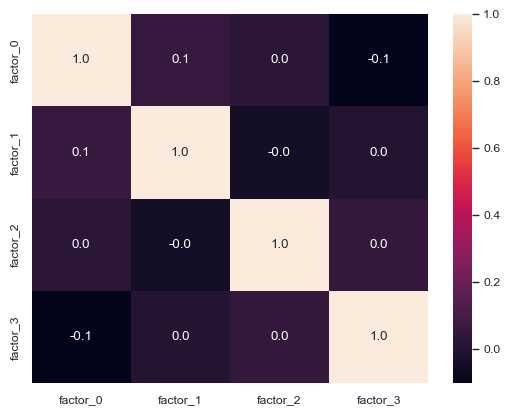

In [46]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

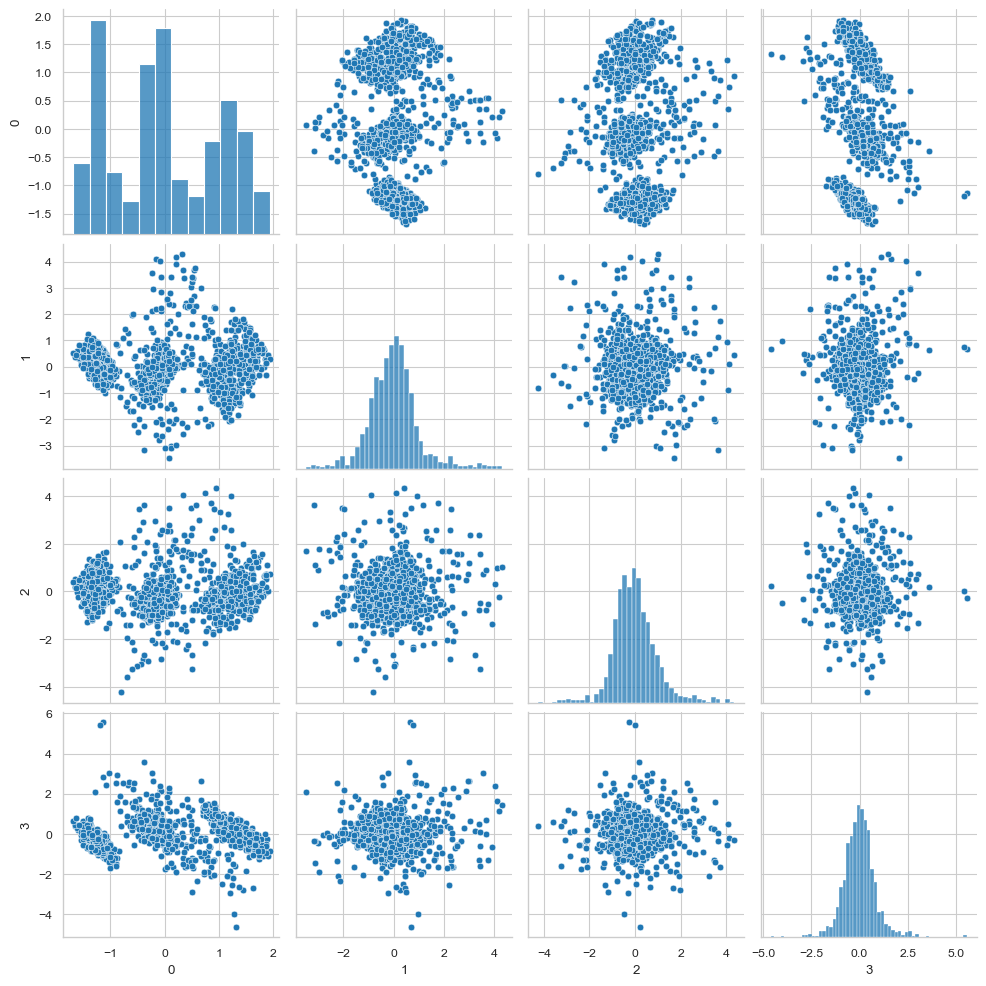

In [47]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

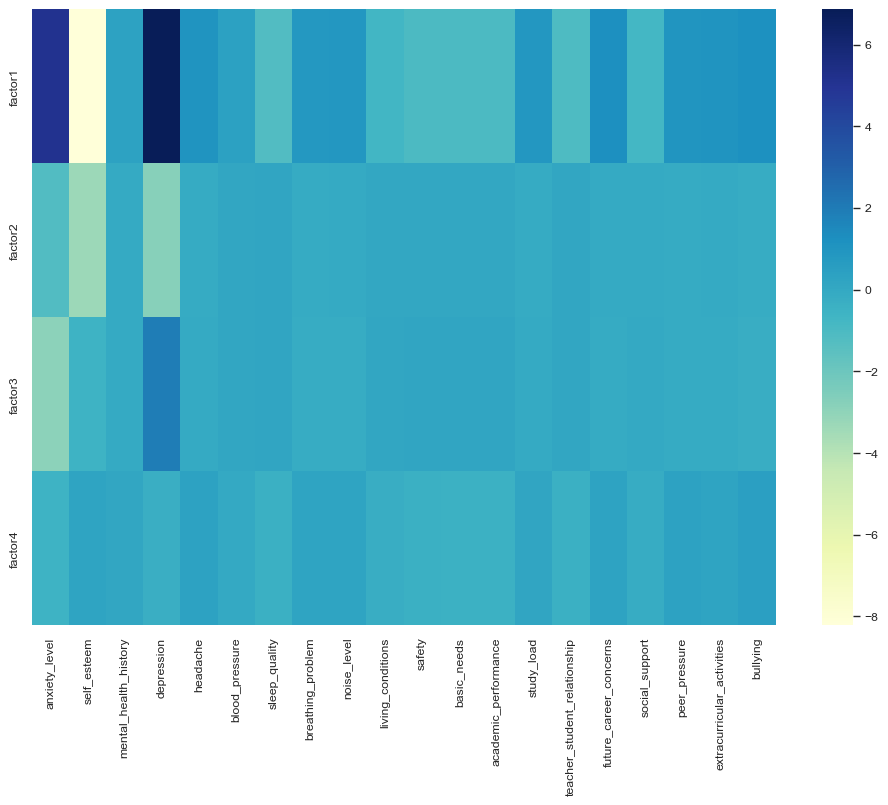

In [48]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 5)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 4 Factors with Standardization

In [49]:
factor_analysis = FactorAnalysis(4, random_state=13)

In [50]:
factor_analysis.fit(scaled_data)

FactorAnalysis(n_components=4, random_state=13)

In [51]:
factor_analysis.components_

array([[ 0.78034364, -0.82624336,  0.68622008,  0.8020639 ,  0.74523406,
         0.66615992, -0.76380582,  0.5654828 ,  0.66875154, -0.62607744,
        -0.75045973, -0.73663527, -0.73512341,  0.6516015 , -0.7963    ,
         0.81152845, -0.87829983,  0.72214213,  0.73427784,  0.78000283],
       [-0.31168697,  0.08546427, -0.28827565, -0.18823745, -0.2197421 ,
         0.63750434,  0.33091904, -0.3530677 , -0.1957416 ,  0.22948643,
         0.25673571,  0.27750814,  0.30803904, -0.18895574,  0.19628116,
        -0.22204185, -0.34230741, -0.2347885 , -0.18420133, -0.27937561],
       [-0.05877985,  0.06301931, -0.08300102, -0.09595636, -0.03518613,
        -0.23788406,  0.01919616, -0.05310717, -0.1247783 ,  0.01144938,
        -0.1709752 , -0.14883715, -0.11818764, -0.15968618, -0.19504628,
        -0.13353266, -0.22284044, -0.2618475 , -0.2368191 , -0.10163232],
       [ 0.02711894, -0.00805614, -0.11679563,  0.06629442, -0.11176858,
        -0.01346903, -0.04427333,  0.05411491, -

In [52]:
factor_analysis.noise_variance_

array([0.28897065, 0.30584552, 0.42707445, 0.31036195, 0.38576304,
       0.09594956, 0.30360842, 0.54702818, 0.49016995, 0.55026146,
       0.3295633 , 0.28957209, 0.34990228, 0.51337689, 0.28797882,
       0.27405308, 0.06352082, 0.3453623 , 0.33869895, 0.30322308])

In [53]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3
anxiety_level                 0.780344 -0.311687 -0.058780  0.027119
self_esteem                  -0.826243  0.085464  0.063019 -0.008056
mental_health_history         0.686220 -0.288276 -0.083001 -0.116796
depression                    0.802064 -0.188237 -0.095956  0.066294
headache                      0.745234 -0.219742 -0.035186 -0.111769
blood_pressure                0.666160  0.637504 -0.237884 -0.013469
sleep_quality                -0.763806  0.330919  0.019196 -0.044273
breathing_problem             0.565483 -0.353068 -0.053107  0.054115
noise_level                   0.668752 -0.195742 -0.124778 -0.078377
living_conditions            -0.626077  0.229486  0.011449 -0.050787
safety                       -0.750460  0.256736 -0.170975 -0.111649
basic_needs                  -0.736635  0.277508 -0.148837  0.260983
academic_performance         -0.735123  0.308039 -0.118188 -0.051705
study_load                    0.651602 -0.188956 -0.159686 -0.011069
teacher_student_relationship -0.796300  0.196281 -0.195046 -0.049221
future_career_concerns        0.811528 -0.222042 -0.133533 -0.012095
social_support               -0.878300 -0.342307 -0.222840 -0.007514
peer_pressure                 0.722142 -0.234789 -0.261847 -0.080613
extracurricular_activities    0.734278 -0.184201 -0.236819  0.167424
bullying                      0.780003 -0.279376 -0.101632  0.011312

[]

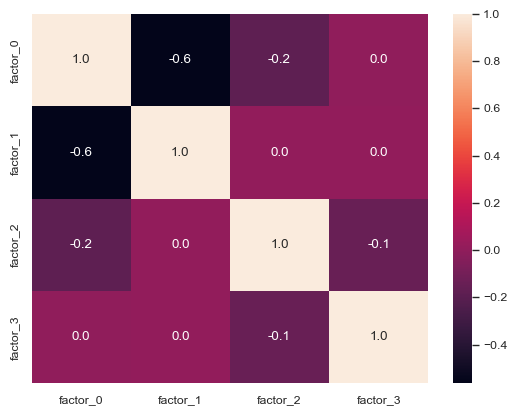

In [54]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

D:\Work\Uni\FMI-multivariate-statistical-modeling\Stress-Factors\venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FactorAnalysis was fitted without feature names
  warnings.warn(


[]

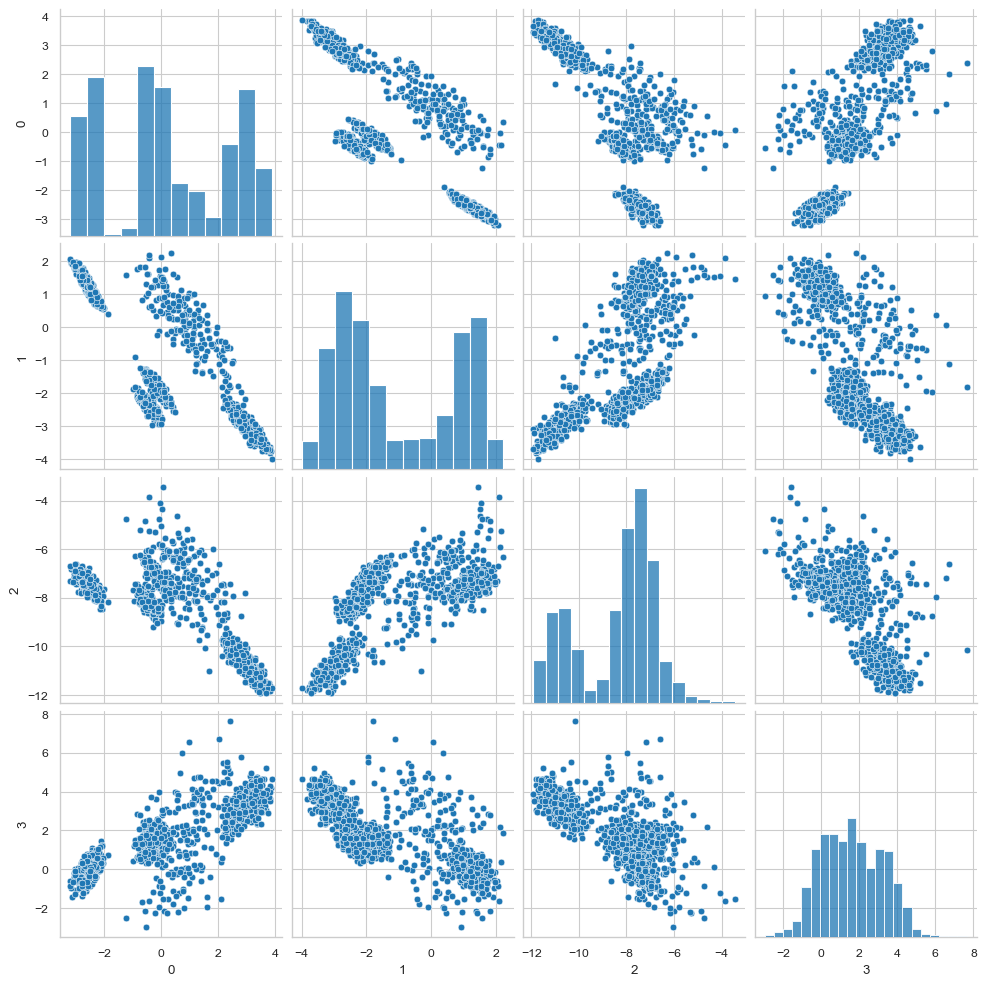

In [55]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))
plt.plot()

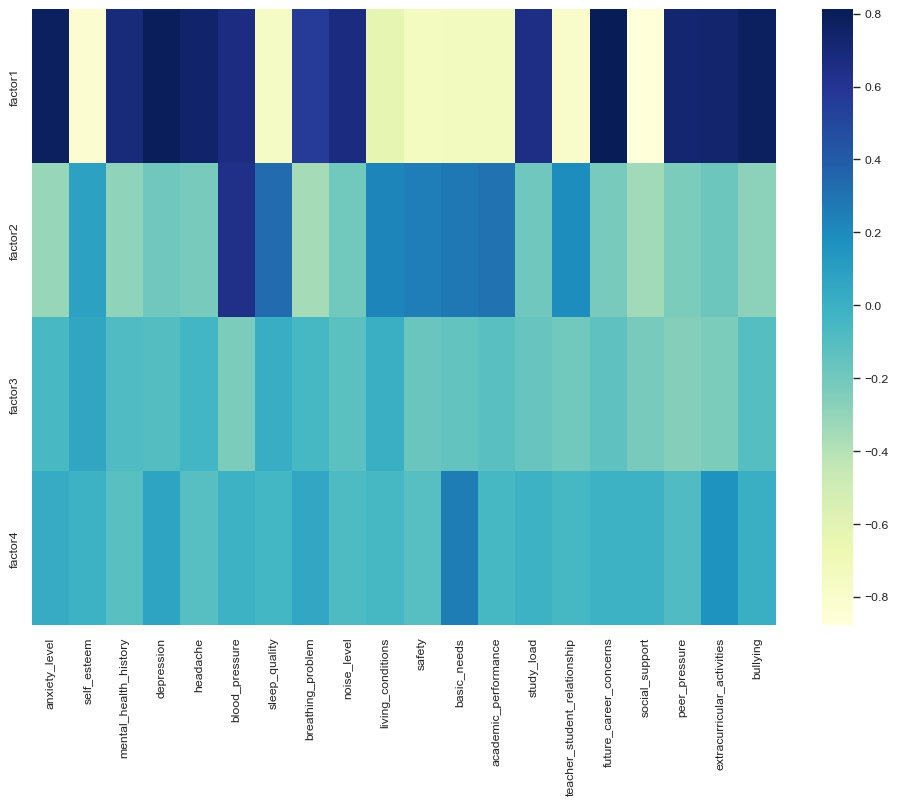

In [56]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 5)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 6 Factors

In [63]:
factor_analysis = FactorAnalysis(6, random_state=13)

In [64]:
factor_analysis.fit(data)

FactorAnalysis(n_components=6, random_state=13)

In [65]:
factor_analysis.components_

array([[ 5.03460826, -8.22451117,  0.34575319,  6.78553479,  1.02887885,
         0.48118373, -1.19078451,  0.81591955,  0.87398514, -0.69573663,
        -1.03060061, -1.02592567, -1.02831085,  0.87009116, -1.06074165,
         1.23666062, -0.82275657,  1.01212595,  1.03652784,  1.16137249],
       [-1.7941676 , -2.44378695, -0.07221975, -2.60801506, -0.15834664,
         0.36630712,  0.28268609, -0.25611914, -0.1182508 ,  0.0948586 ,
         0.11985608,  0.12511392,  0.17263642, -0.14634104,  0.12067147,
        -0.13824242, -0.29435293, -0.18761648, -0.11936678, -0.23602902],
       [-1.0262895 ,  2.06953671, -0.04156347,  1.4796678 ,  0.0148256 ,
         0.45199344,  0.12856794, -0.21625455, -0.04260849,  0.08177555,
         0.07193358,  0.09477688,  0.11832049, -0.02043166, -0.05744568,
        -0.0482196 , -0.42617062, -0.02647501, -0.011161  , -0.05233208],
       [ 2.49937345,  1.00131261,  0.03549662, -1.88321444,  0.09027599,
         0.10300073, -0.13227518,  0.08505724,  

In [66]:
factor_analysis.noise_variance_

array([0.99712562, 0.99460699, 0.11019145, 1.00205196, 0.77797594,
       0.04271165, 0.73806081, 1.08736526, 0.87723589, 0.69405124,
       0.67974743, 0.75880114, 0.70026107, 0.89816669, 0.55600059,
       0.64743787, 0.04201491, 0.69126164, 0.77770553, 0.67195193])

In [67]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  \
anxiety_level                 5.034608 -1.794168 -1.026289  2.499373   
self_esteem                  -8.224511 -2.443787  2.069537  1.001313   
mental_health_history         0.345753 -0.072220 -0.041563  0.035497   
depression                    6.785535 -2.608015  1.479668 -1.883214   
headache                      1.028879 -0.158347  0.014826  0.090276   
blood_pressure                0.481184  0.366307  0.451993  0.103001   
sleep_quality                -1.190785  0.282686  0.128568 -0.132275   
breathing_problem             0.815920 -0.256119 -0.216255  0.085057   
noise_level                   0.873985 -0.118251 -0.042608  0.162736   
living_conditions            -0.695737  0.094859  0.081776 -0.110458   
safety                       -1.030601  0.119856  0.071934 -0.169291   
basic_needs                  -1.025926  0.125114  0.094777 -0.164735   
academic_performance         -1.028311  0.172636  0.118320 -0.126205   
study_load                    0.870091 -0.146341 -0.020432  0.048446   
teacher_student_relationship -1.060742  0.120671 -0.057446 -0.164762   
future_career_concerns        1.236661 -0.138242 -0.048220  0.136019   
social_support               -0.822757 -0.294353 -0.426171 -0.229722   
peer_pressure                 1.012126 -0.187616 -0.026475  0.118927   
extracurricular_activities    1.036528 -0.119367 -0.011161  0.085672   
bullying                      1.161372 -0.236029 -0.052332  0.230784   

                              factor_4  factor_5  
anxiety_level                -0.615024  0.385589  
self_esteem                   0.123950 -0.151612  
mental_health_history         0.038892 -0.100622  
depression                   -0.150489  0.215876  
headache                      0.189429 -0.282044  
blood_pressure               -0.255314 -0.078365  
sleep_quality                -0.228357  0.275532  
breathing_problem             0.151224 -0.254557  
noise_level                   0.025188 -0.283850  
living_conditions            -0.129234  0.168585  
safety                       -0.412408  0.118387  
basic_needs                  -0.390323  0.195637  
academic_performance         -0.379906  0.195210  
study_load                   -0.023522 -0.225371  
teacher_student_relationship -0.424348  0.097243  
future_career_concerns        0.051007 -0.340996  
social_support               -0.222238 -0.089645  
peer_pressure                -0.064265 -0.507114  
extracurricular_activities   -0.061472 -0.362878  
bullying                      0.142061 -0.432183

[]

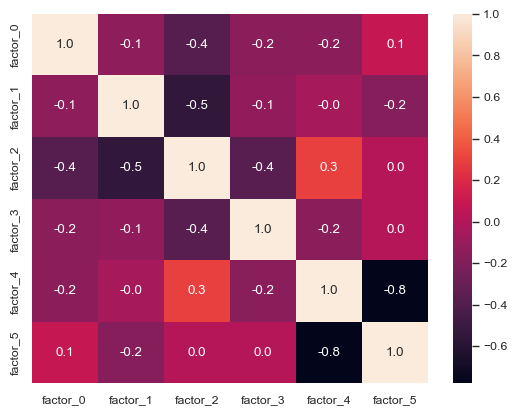

In [68]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

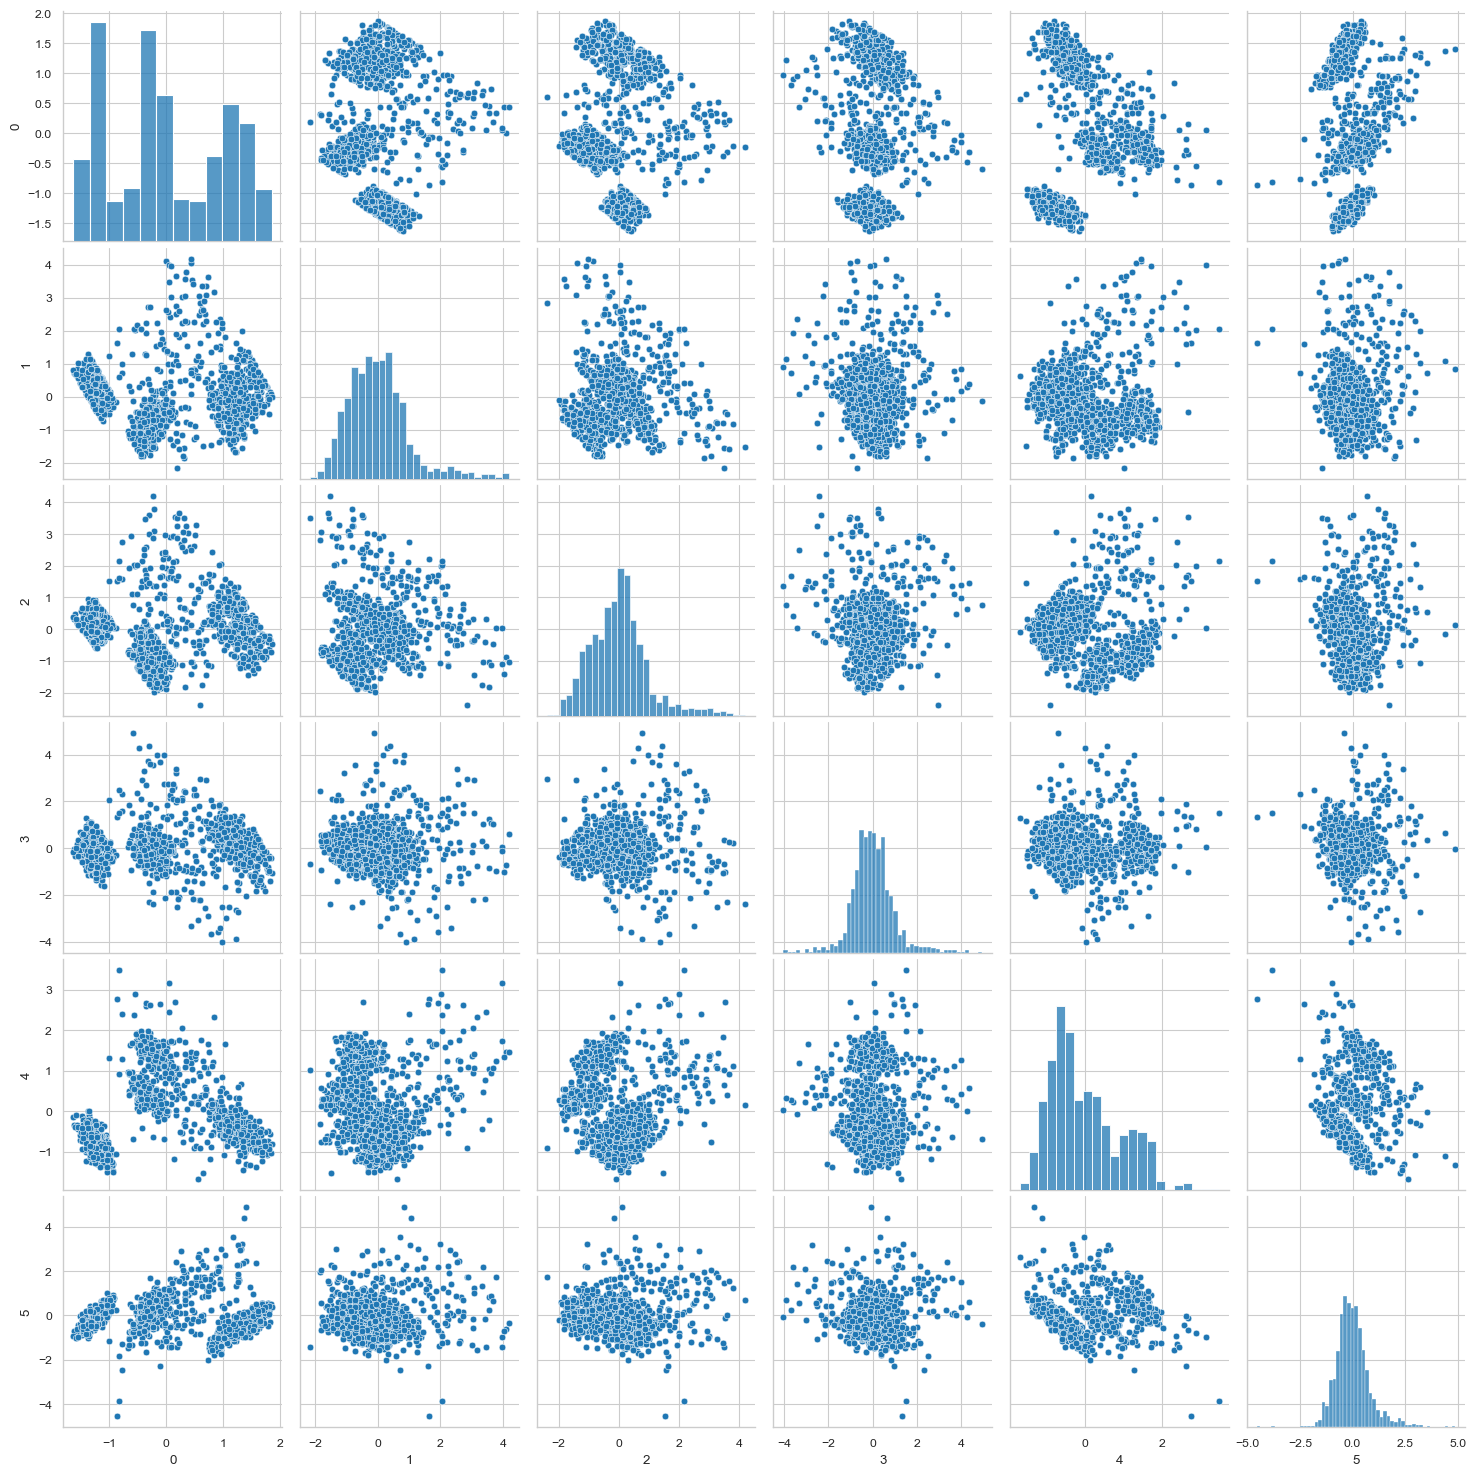

In [69]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

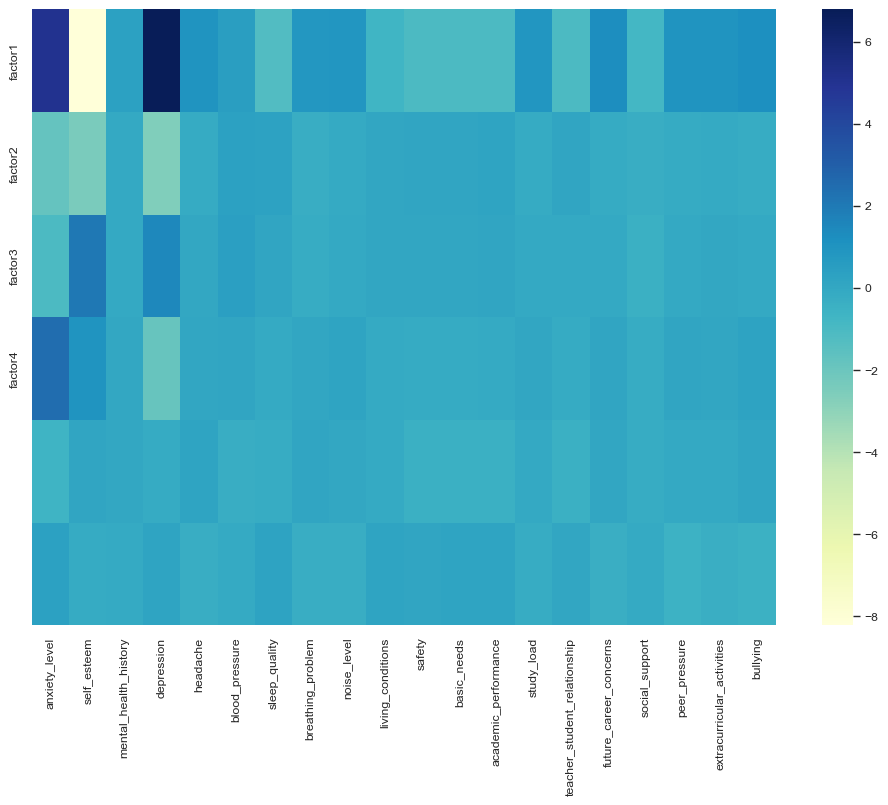

In [70]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 5)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 6 Factors with Standardization

In [71]:
factor_analysis = FactorAnalysis(6, random_state=13)

In [72]:
factor_analysis.fit(scaled_data)

FactorAnalysis(n_components=6, random_state=13)

In [73]:
factor_analysis.components_

array([[ 0.78440114, -0.8305784 ,  0.69082849,  0.80517506,  0.74934541,
         0.65702213, -0.76856135,  0.57135921,  0.67202686, -0.62910343,
        -0.75381534, -0.7441599 , -0.73934486,  0.65460396, -0.79890468,
         0.81500026, -0.87219692,  0.72644875,  0.73596704,  0.78622934],
       [-0.29849517,  0.07295473, -0.27751267, -0.17493875, -0.20917883,
         0.6490237 ,  0.31882027, -0.34589228, -0.18537956,  0.21886156,
         0.24583126,  0.27377915,  0.29700675, -0.17790733,  0.1849872 ,
        -0.20847813, -0.35410527, -0.22333211, -0.1693797 , -0.27089614],
       [-0.06077096,  0.06377921, -0.08431262, -0.09742173, -0.03451976,
        -0.23228585,  0.02359996, -0.05605206, -0.12359702,  0.01525916,
        -0.17108034, -0.16353109, -0.11504484, -0.15865137, -0.19677652,
        -0.1338461 , -0.22529101, -0.26153926, -0.23725964, -0.10657089],
       [ 0.04788143, -0.01048271, -0.05938033,  0.05208593, -0.05763477,
        -0.02345668, -0.06011392,  0.01643002, -

In [74]:
factor_analysis.noise_variance_

array([0.28820061, 0.25293977, 0.42159936, 0.29633031, 0.35301472,
       0.09528846, 0.29518382, 0.51485755, 0.48143099, 0.54971837,
       0.31950462, 0.24185793, 0.34857534, 0.51042554, 0.27484197,
       0.2715109 , 0.06450629, 0.33172452, 0.34853245, 0.25880628])

In [75]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  \
anxiety_level                 0.784401 -0.298495 -0.060771  0.047881   
self_esteem                  -0.830578  0.072955  0.063779 -0.010483   
mental_health_history         0.690828 -0.277513 -0.084313 -0.059380   
depression                    0.805175 -0.174939 -0.097422  0.052086   
headache                      0.749345 -0.209179 -0.034520 -0.057635   
blood_pressure                0.657022  0.649024 -0.232286 -0.023457   
sleep_quality                -0.768561  0.318820  0.023600 -0.060114   
breathing_problem             0.571359 -0.345892 -0.056052  0.016430   
noise_level                   0.672027 -0.185380 -0.123597 -0.066233   
living_conditions            -0.629103  0.218862  0.015259 -0.097273   
safety                       -0.753815  0.245831 -0.171080 -0.093117   
basic_needs                  -0.744160  0.273779 -0.163531  0.313129   
academic_performance         -0.739345  0.297007 -0.115045 -0.053612   
study_load                    0.654604 -0.177907 -0.158651 -0.045639   
teacher_student_relationship -0.798905  0.184987 -0.196777 -0.070023   
future_career_concerns        0.815000 -0.208478 -0.133846  0.009894   
social_support               -0.872197 -0.354105 -0.225291 -0.014724   
peer_pressure                 0.726449 -0.223332 -0.261539 -0.123160   
extracurricular_activities    0.735967 -0.169380 -0.237260  0.154897   
bullying                      0.786229 -0.270896 -0.106571  0.026457   

                              factor_4  factor_5  
anxiety_level                 0.029592  0.006417  
self_esteem                   0.144440  0.157848  
mental_health_history        -0.077160  0.012102  
depression                   -0.116925  0.050825  
headache                     -0.151244  0.095104  
blood_pressure                0.011552 -0.001257  
sleep_quality                -0.006850 -0.084307  
breathing_problem             0.121954 -0.119328  
noise_level                   0.074208 -0.029891  
living_conditions             0.011790  0.091799  
safety                       -0.046007  0.092648  
basic_needs                  -0.029232  0.054154  
academic_performance          0.013956 -0.022929  
study_load                   -0.049933  0.005009  
teacher_student_relationship  0.019881 -0.109860  
future_career_concerns       -0.038530 -0.036216  
social_support               -0.010843 -0.007498  
peer_pressure                 0.038477  0.119729  
extracurricular_activities    0.036534 -0.044774  
bullying                      0.196383  0.019721

[]

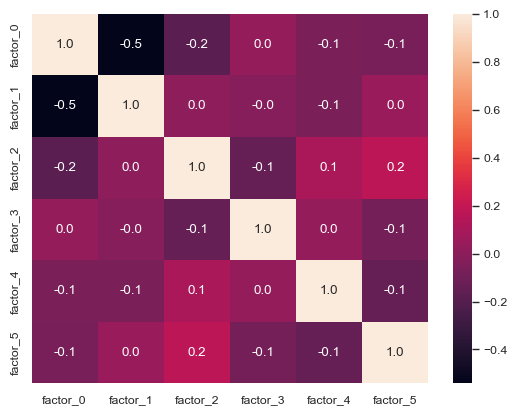

In [76]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

D:\Work\Uni\FMI-multivariate-statistical-modeling\Stress-Factors\venv\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but FactorAnalysis was fitted without feature names



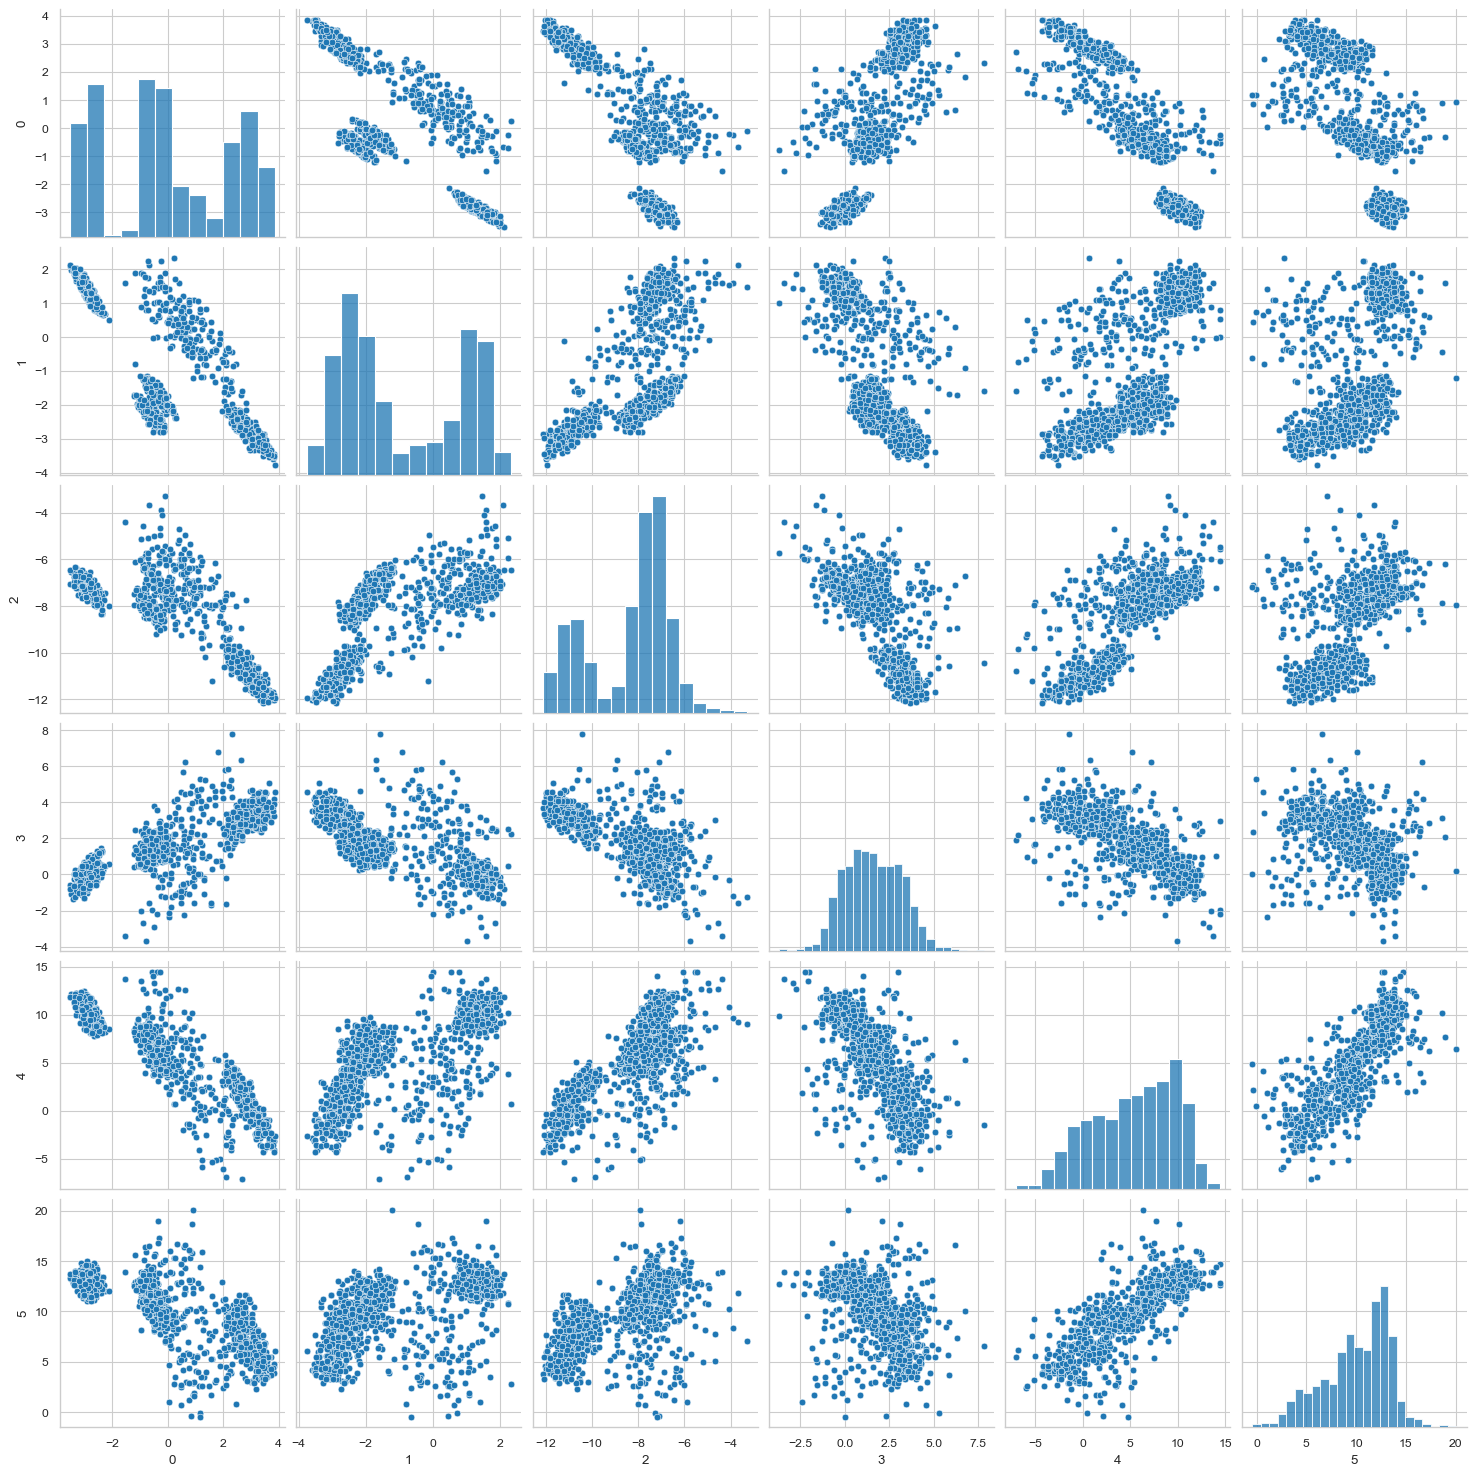

In [77]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

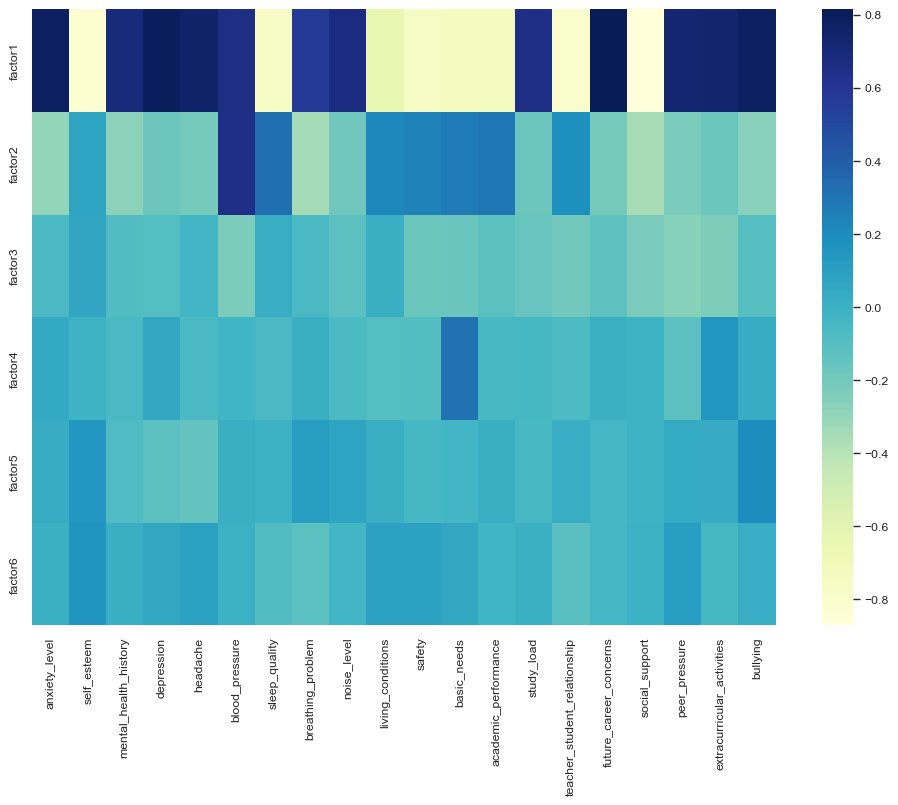

In [78]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 7)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 7 Factors with Standardization

In [87]:
factor_analysis = FactorAnalysis(7, random_state=13)

In [88]:
factor_analysis.fit(scaled_data)

FactorAnalysis(n_components=7, random_state=13)

In [89]:
factor_analysis.components_

array([[ 0.78619868, -0.82965473,  0.69244734,  0.8070285 ,  0.75098047,
         0.65256793, -0.77087577,  0.57342683,  0.67325623, -0.63095466,
        -0.75688593, -0.74635609, -0.74118188,  0.65612453, -0.80030076,
         0.81630171, -0.86979018,  0.72967528,  0.73673948,  0.7885702 ],
       [-0.29283582,  0.06649154, -0.27261176, -0.17018777, -0.20429304,
         0.65243857,  0.3139317 , -0.34169586, -0.18112448,  0.21530703,
         0.24245115,  0.26900988,  0.29141313, -0.17420913,  0.17887472,
        -0.20315506, -0.36093722, -0.22171859, -0.16444143, -0.26659116],
       [-0.05970261,  0.06038305, -0.08119804, -0.0977264 , -0.03501919,
        -0.23391821,  0.02441976, -0.05506287, -0.12048859,  0.01044615,
        -0.17879268, -0.16429836, -0.11605128, -0.16160044, -0.19627418,
        -0.13227488, -0.22382786, -0.27411004, -0.23261812, -0.10605924],
       [ 0.04758555, -0.03147973, -0.09175945,  0.05012936, -0.08243286,
        -0.02490059, -0.08156338,  0.06418806, -

In [90]:
factor_analysis.noise_variance_

array([0.28773124, 0.2673465 , 0.42147102, 0.27974218, 0.34680593,
       0.09578891, 0.29007203, 0.51638746, 0.48107568, 0.52766807,
       0.2899225 , 0.2344978 , 0.34510293, 0.49051636, 0.27059066,
       0.26993759, 0.06429124, 0.29933341, 0.35199796, 0.25045218])

In [91]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  \
anxiety_level                 0.786199 -0.292836 -0.059703  0.047586   
self_esteem                  -0.829655  0.066492  0.060383 -0.031480   
mental_health_history         0.692447 -0.272612 -0.081198 -0.091759   
depression                    0.807028 -0.170188 -0.097726  0.050129   
headache                      0.750980 -0.204293 -0.035019 -0.082433   
blood_pressure                0.652568  0.652439 -0.233918 -0.024901   
sleep_quality                -0.770876  0.313932  0.024420 -0.081563   
breathing_problem             0.573427 -0.341696 -0.055063  0.064188   
noise_level                   0.673256 -0.181124 -0.120489 -0.097338   
living_conditions            -0.630955  0.215307  0.010446 -0.066728   
safety                       -0.756886  0.242451 -0.178793 -0.126801   
basic_needs                  -0.746356  0.269010 -0.164298  0.321822   
academic_performance         -0.741182  0.291413 -0.116051 -0.036594   
study_load                    0.656125 -0.174209 -0.161600 -0.014939   
teacher_student_relationship -0.800301  0.178875 -0.196274 -0.049811   
future_career_concerns        0.816302 -0.203155 -0.132275  0.023417   
social_support               -0.869790 -0.360937 -0.223828 -0.015661   
peer_pressure                 0.729675 -0.221719 -0.274110 -0.104366   
extracurricular_activities    0.736739 -0.164441 -0.232618  0.154846   
bullying                      0.788570 -0.266591 -0.106059  0.009501   

                              factor_4  factor_5  factor_6  
anxiety_level                 0.023450 -0.013709  0.057092  
self_esteem                   0.109422  0.147569 -0.021976  
mental_health_history        -0.073856 -0.014323  0.065011  
depression                   -0.128288 -0.017553  0.048635  
headache                     -0.171234  0.077440 -0.075360  
blood_pressure                0.013618 -0.010522 -0.007378  
sleep_quality                 0.012277 -0.106883 -0.024881  
breathing_problem             0.126872 -0.097151  0.025147  
noise_level                   0.074422 -0.033012 -0.035616  
living_conditions            -0.001132  0.089850  0.115447  
safety                       -0.069919  0.092717  0.141608  
basic_needs                  -0.033639  0.069578 -0.006285  
academic_performance          0.025691 -0.053998 -0.057401  
study_load                   -0.072090  0.001676  0.132084  
teacher_student_relationship  0.023331 -0.090254  0.017461  
future_career_concerns       -0.039333 -0.033218 -0.054420  
social_support               -0.006847 -0.017494 -0.009799  
peer_pressure                 0.041974  0.141235 -0.118424  
extracurricular_activities    0.023808 -0.019060  0.001193  
bullying                      0.202109  0.028197  0.081155

[]

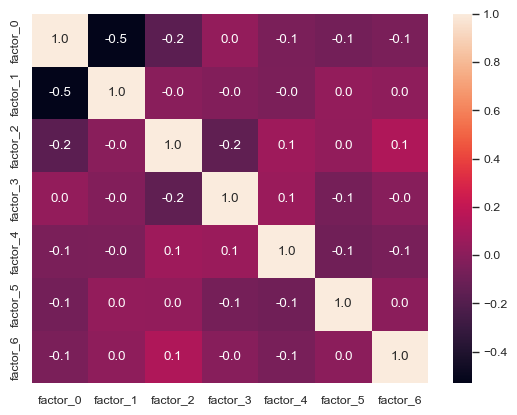

In [92]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

D:\Work\Uni\FMI-multivariate-statistical-modeling\Stress-Factors\venv\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but FactorAnalysis was fitted without feature names



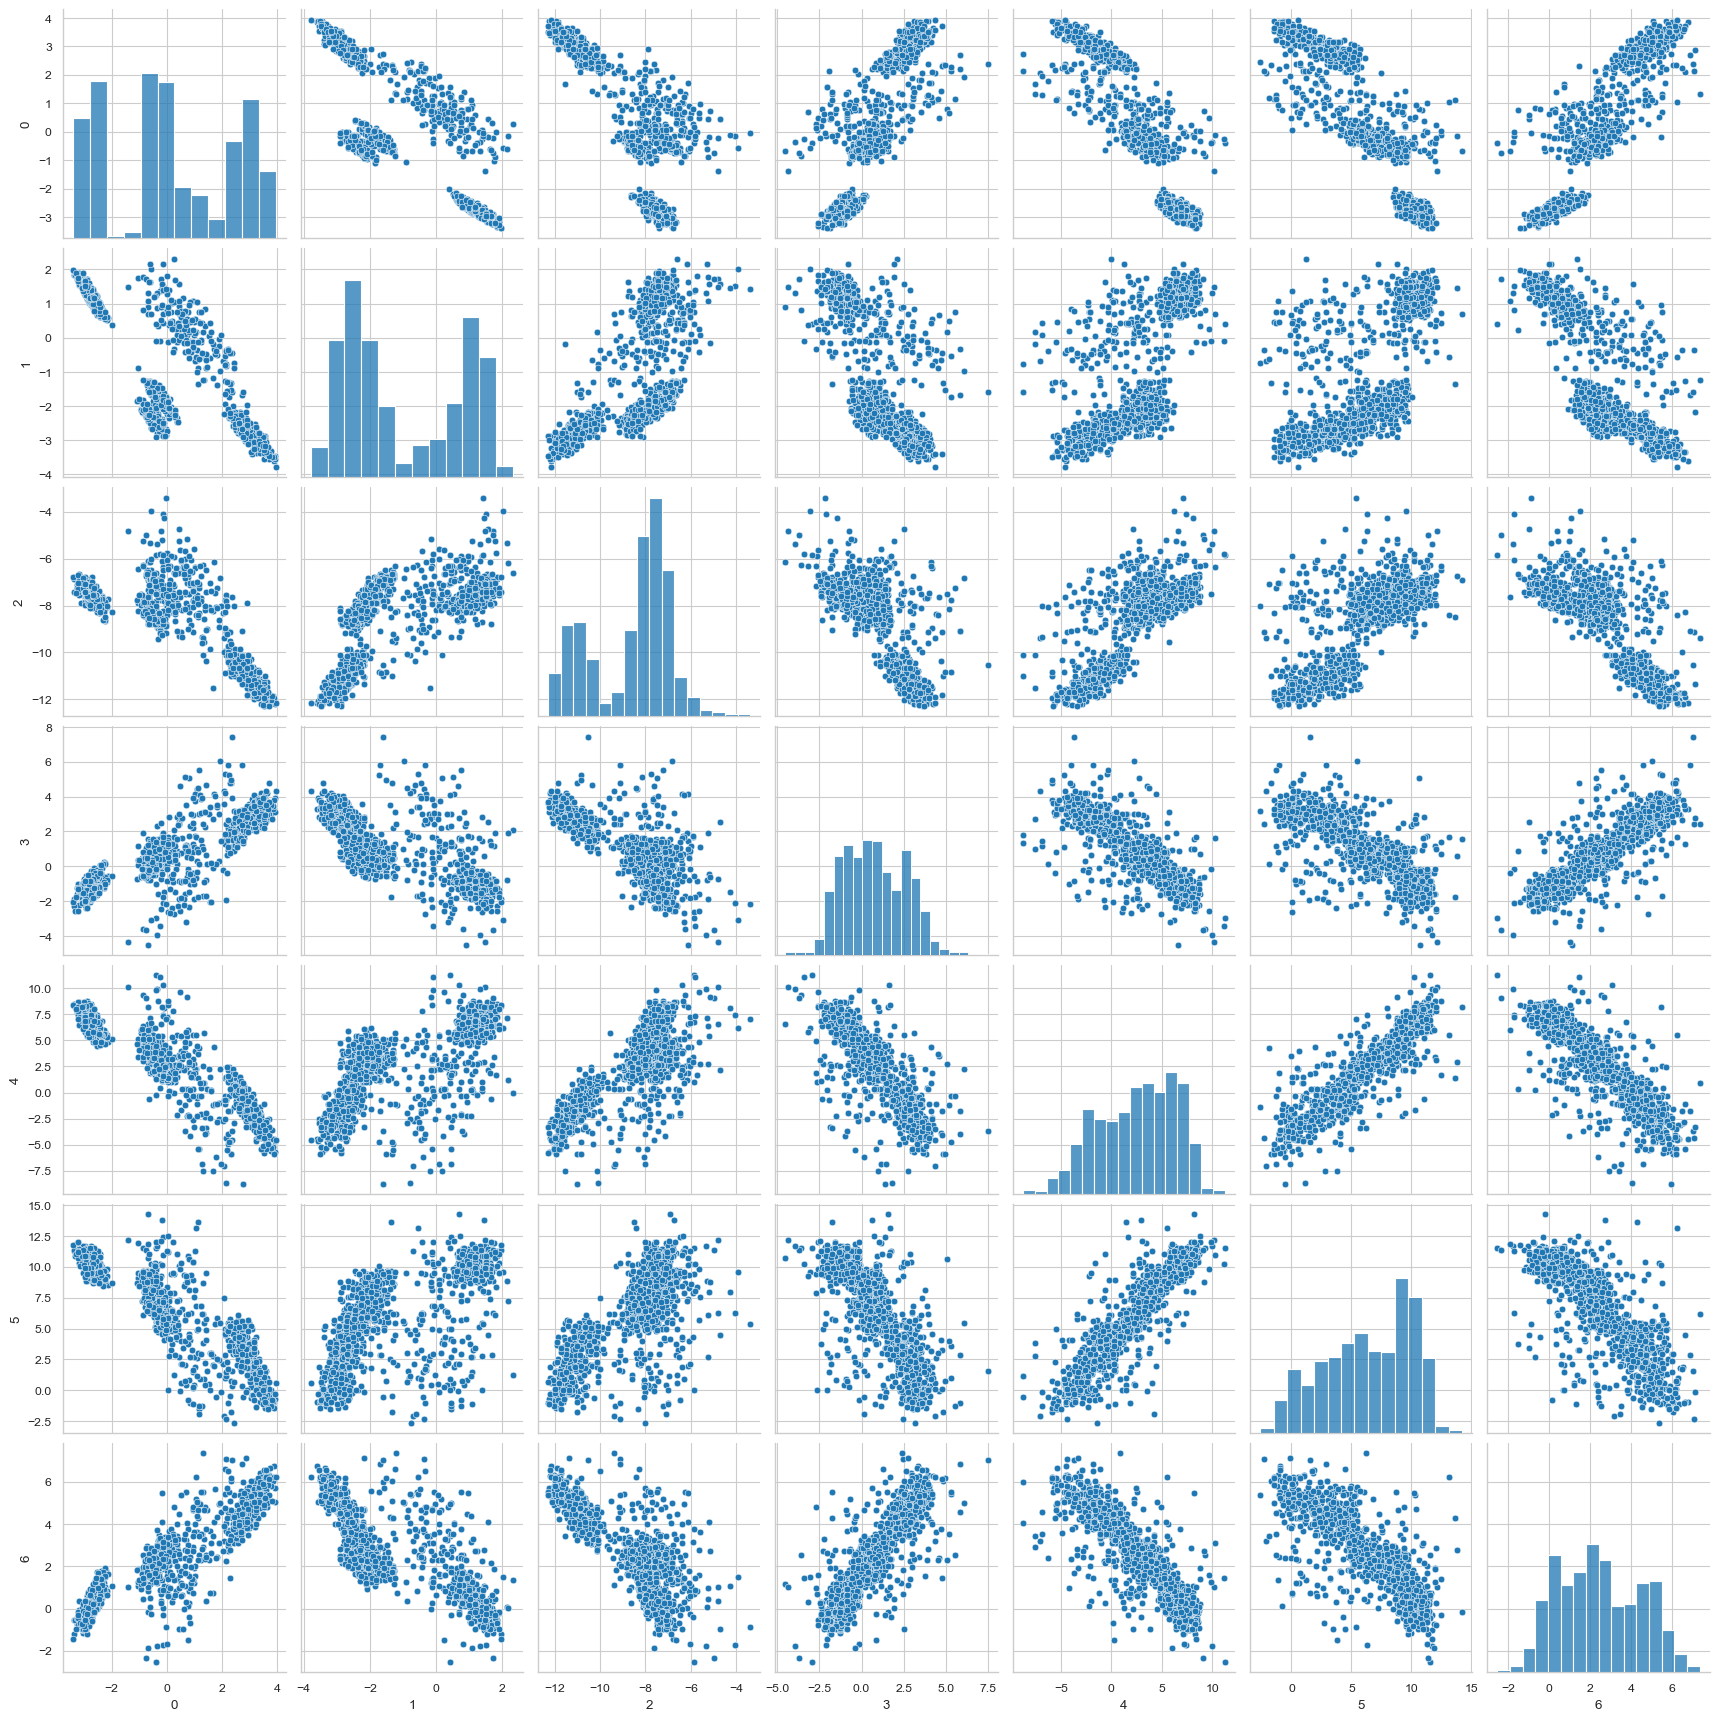

In [93]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

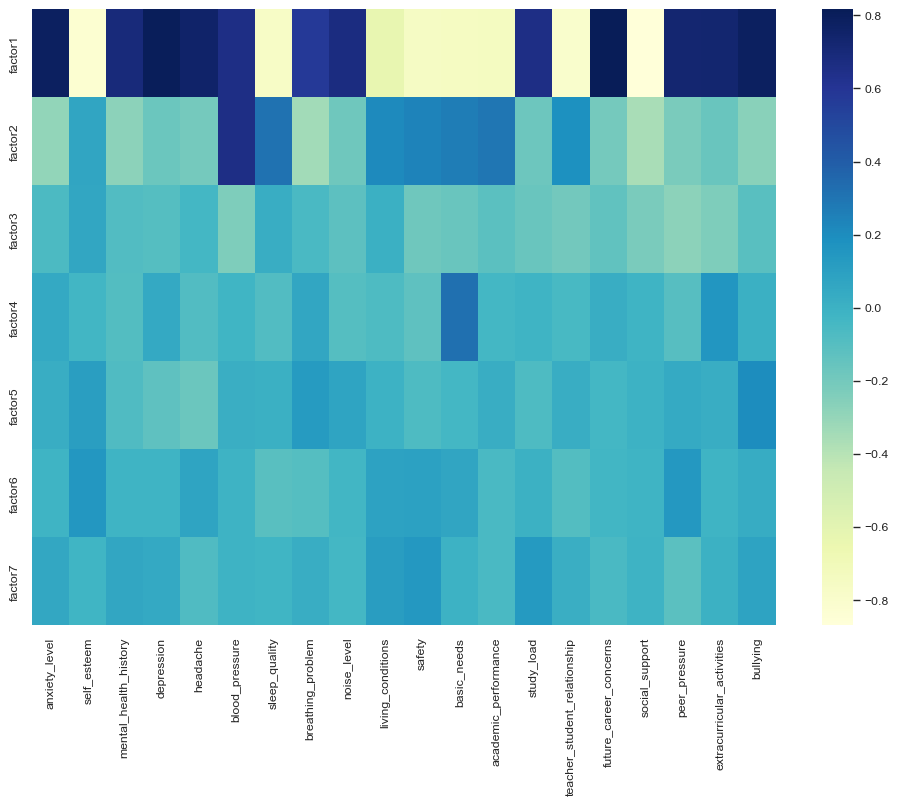

In [94]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 8)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

### 10 Factors with Standardization

In [103]:
factor_analysis = FactorAnalysis(10, random_state=13)

In [104]:
factor_analysis.fit(scaled_data)

FactorAnalysis(n_components=10, random_state=13)

In [105]:
factor_analysis.components_

array([[ 7.18733296e-01, -7.98906387e-01,  6.29535857e-01,
         7.57943894e-01,  7.05733337e-01,  7.56439938e-01,
        -7.00568867e-01,  5.01289654e-01,  6.27917675e-01,
        -5.80045709e-01, -7.03524550e-01, -6.93623238e-01,
        -6.82996575e-01,  6.09225858e-01, -7.58305744e-01,
         7.61135730e-01, -9.35344213e-01,  6.69019641e-01,
         6.86591615e-01,  7.28427101e-01],
       [-4.20968674e-01,  2.09943252e-01, -3.84386762e-01,
        -3.04213455e-01, -3.44676614e-01,  5.58879757e-01,
         4.39970089e-01, -4.28032406e-01, -2.93945629e-01,
         3.19276223e-01,  3.76530173e-01,  4.12078294e-01,
         4.31767131e-01, -2.80232804e-01,  3.26473085e-01,
        -3.36757735e-01, -1.93727351e-01, -3.28761988e-01,
        -2.77990255e-01, -4.00512364e-01],
       [-1.00445683e-01,  1.03737671e-01, -1.27611557e-01,
        -1.35447189e-01, -8.41312028e-02, -2.60816404e-01,
         7.05366321e-02, -9.30685923e-02, -1.64542823e-01,
         5.61285606e-02, -1.1

In [106]:
factor_analysis.noise_variance_

array([0.27926802, 0.25411915, 0.42552657, 0.27521245, 0.21909366,
       0.04642003, 0.28679699, 0.52924125, 0.3717947 , 0.52136719,
       0.30947332, 0.1814796 , 0.25154015, 0.47028474, 0.27847302,
       0.25699576, 0.0294364 , 0.32005552, 0.35296853, 0.18345285])

In [107]:
factor_df = pd.DataFrame(
    factor_analysis.components_.T, 
    columns=['factor_' + str(i) for i in range(factor_analysis.components_.shape[0])], 
    index=list(data.columns)
)

factor_df

factor_0  factor_1  factor_2  factor_3  \
anxiety_level                 0.718733 -0.420969 -0.100446  0.071660   
self_esteem                  -0.798906  0.209943  0.103738 -0.012242   
mental_health_history         0.629536 -0.384387 -0.127612 -0.059560   
depression                    0.757944 -0.304213 -0.135447  0.058773   
headache                      0.705733 -0.344677 -0.084131 -0.149447   
blood_pressure                0.756440  0.558880 -0.260816 -0.022662   
sleep_quality                -0.700569  0.439970  0.070537 -0.095667   
breathing_problem             0.501290 -0.428032 -0.093069  0.076124   
noise_level                   0.627918 -0.293946 -0.164543 -0.086483   
living_conditions            -0.580046  0.319276  0.056129 -0.053852   
safety                       -0.703525  0.376530 -0.119032 -0.097305   
basic_needs                  -0.693623  0.412078 -0.094007  0.365756   
academic_performance         -0.682997  0.431767 -0.062977 -0.057651   
study_load                    0.609226 -0.280233 -0.185113  0.008154   
teacher_student_relationship -0.758306  0.326473 -0.141424 -0.057572   
future_career_concerns        0.761136 -0.336758 -0.178984  0.024046   
social_support               -0.935344 -0.193727 -0.239933 -0.016950   
peer_pressure                 0.669020 -0.328762 -0.299049 -0.053838   
extracurricular_activities    0.686592 -0.277990 -0.253701  0.153138   
bullying                      0.728427 -0.400512 -0.164451  0.098744   

                              factor_4  factor_5  factor_6  factor_7  \
anxiety_level                 0.022774 -0.062706 -0.057016  0.005378   
self_esteem                   0.042103  0.177513 -0.127486  0.040039   
mental_health_history        -0.035627  0.011628  0.033051 -0.007846   
depression                   -0.098362 -0.073391  0.031493  0.024659   
headache                     -0.326300  0.145942 -0.058329 -0.025659   
blood_pressure                0.011693  0.004174  0.017841 -0.000630   
sleep_quality                 0.018081  0.009924  0.010992 -0.074747   
breathing_problem             0.103740 -0.063231 -0.019133 -0.065171   
noise_level                   0.073391 -0.128438 -0.203295  0.184738   
living_conditions             0.042388  0.050780  0.042506  0.147648   
safety                       -0.020975  0.079198  0.026171  0.087662   
basic_needs                  -0.146398  0.029482 -0.047205  0.021797   
academic_performance          0.013422 -0.094403 -0.230482 -0.130177   
study_load                   -0.021458 -0.017563  0.013769  0.044855   
teacher_student_relationship  0.026622 -0.000732  0.006121 -0.016961   
future_career_concerns       -0.044288 -0.022329  0.020633 -0.117792   
social_support                0.001437 -0.004333  0.016826 -0.002351   
peer_pressure                -0.002617  0.028951 -0.098058  0.050503   
extracurricular_activities   -0.022727 -0.048152 -0.007125  0.022724   
bullying                      0.222385  0.187012 -0.028320 -0.042999   

                              factor_8  factor_9  
anxiety_level                -0.054166 -0.032249  
self_esteem                  -0.010269  0.036604  
mental_health_history        -0.085717 -0.025336  
depression                   -0.138360  0.012565  
headache                      0.036759 -0.042065  
blood_pressure                0.008178  0.008243  
sleep_quality                 0.037531 -0.084565  
breathing_problem             0.038396 -0.030726  
noise_level                   0.101048 -0.072861  
living_conditions            -0.078710  0.000812  
safety                       -0.121436 -0.017474  
basic_needs                   0.006994 -0.013956  
academic_performance         -0.095969  0.006243  
study_load                   -0.148462 -0.144009  
teacher_student_relationship  0.041847 -0.117519  
future_career_concerns        0.012070  0.027259  
social_support                0.005577  0.006713  
peer_pressure                 0.010996  0.136800  
extracurricular_activities    0.076

[]

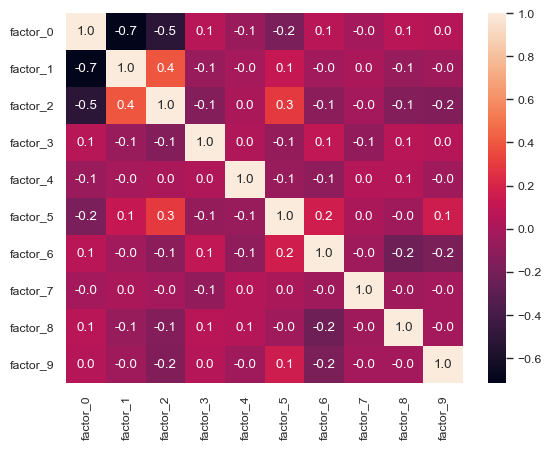

In [108]:
sns.heatmap(factor_df.corr(), annot=True, fmt=".1f")
plt.plot()

D:\Work\Uni\FMI-multivariate-statistical-modeling\Stress-Factors\venv\lib\site-packages\sklearn\base.py:458: UserWarning:

X has feature names, but FactorAnalysis was fitted without feature names



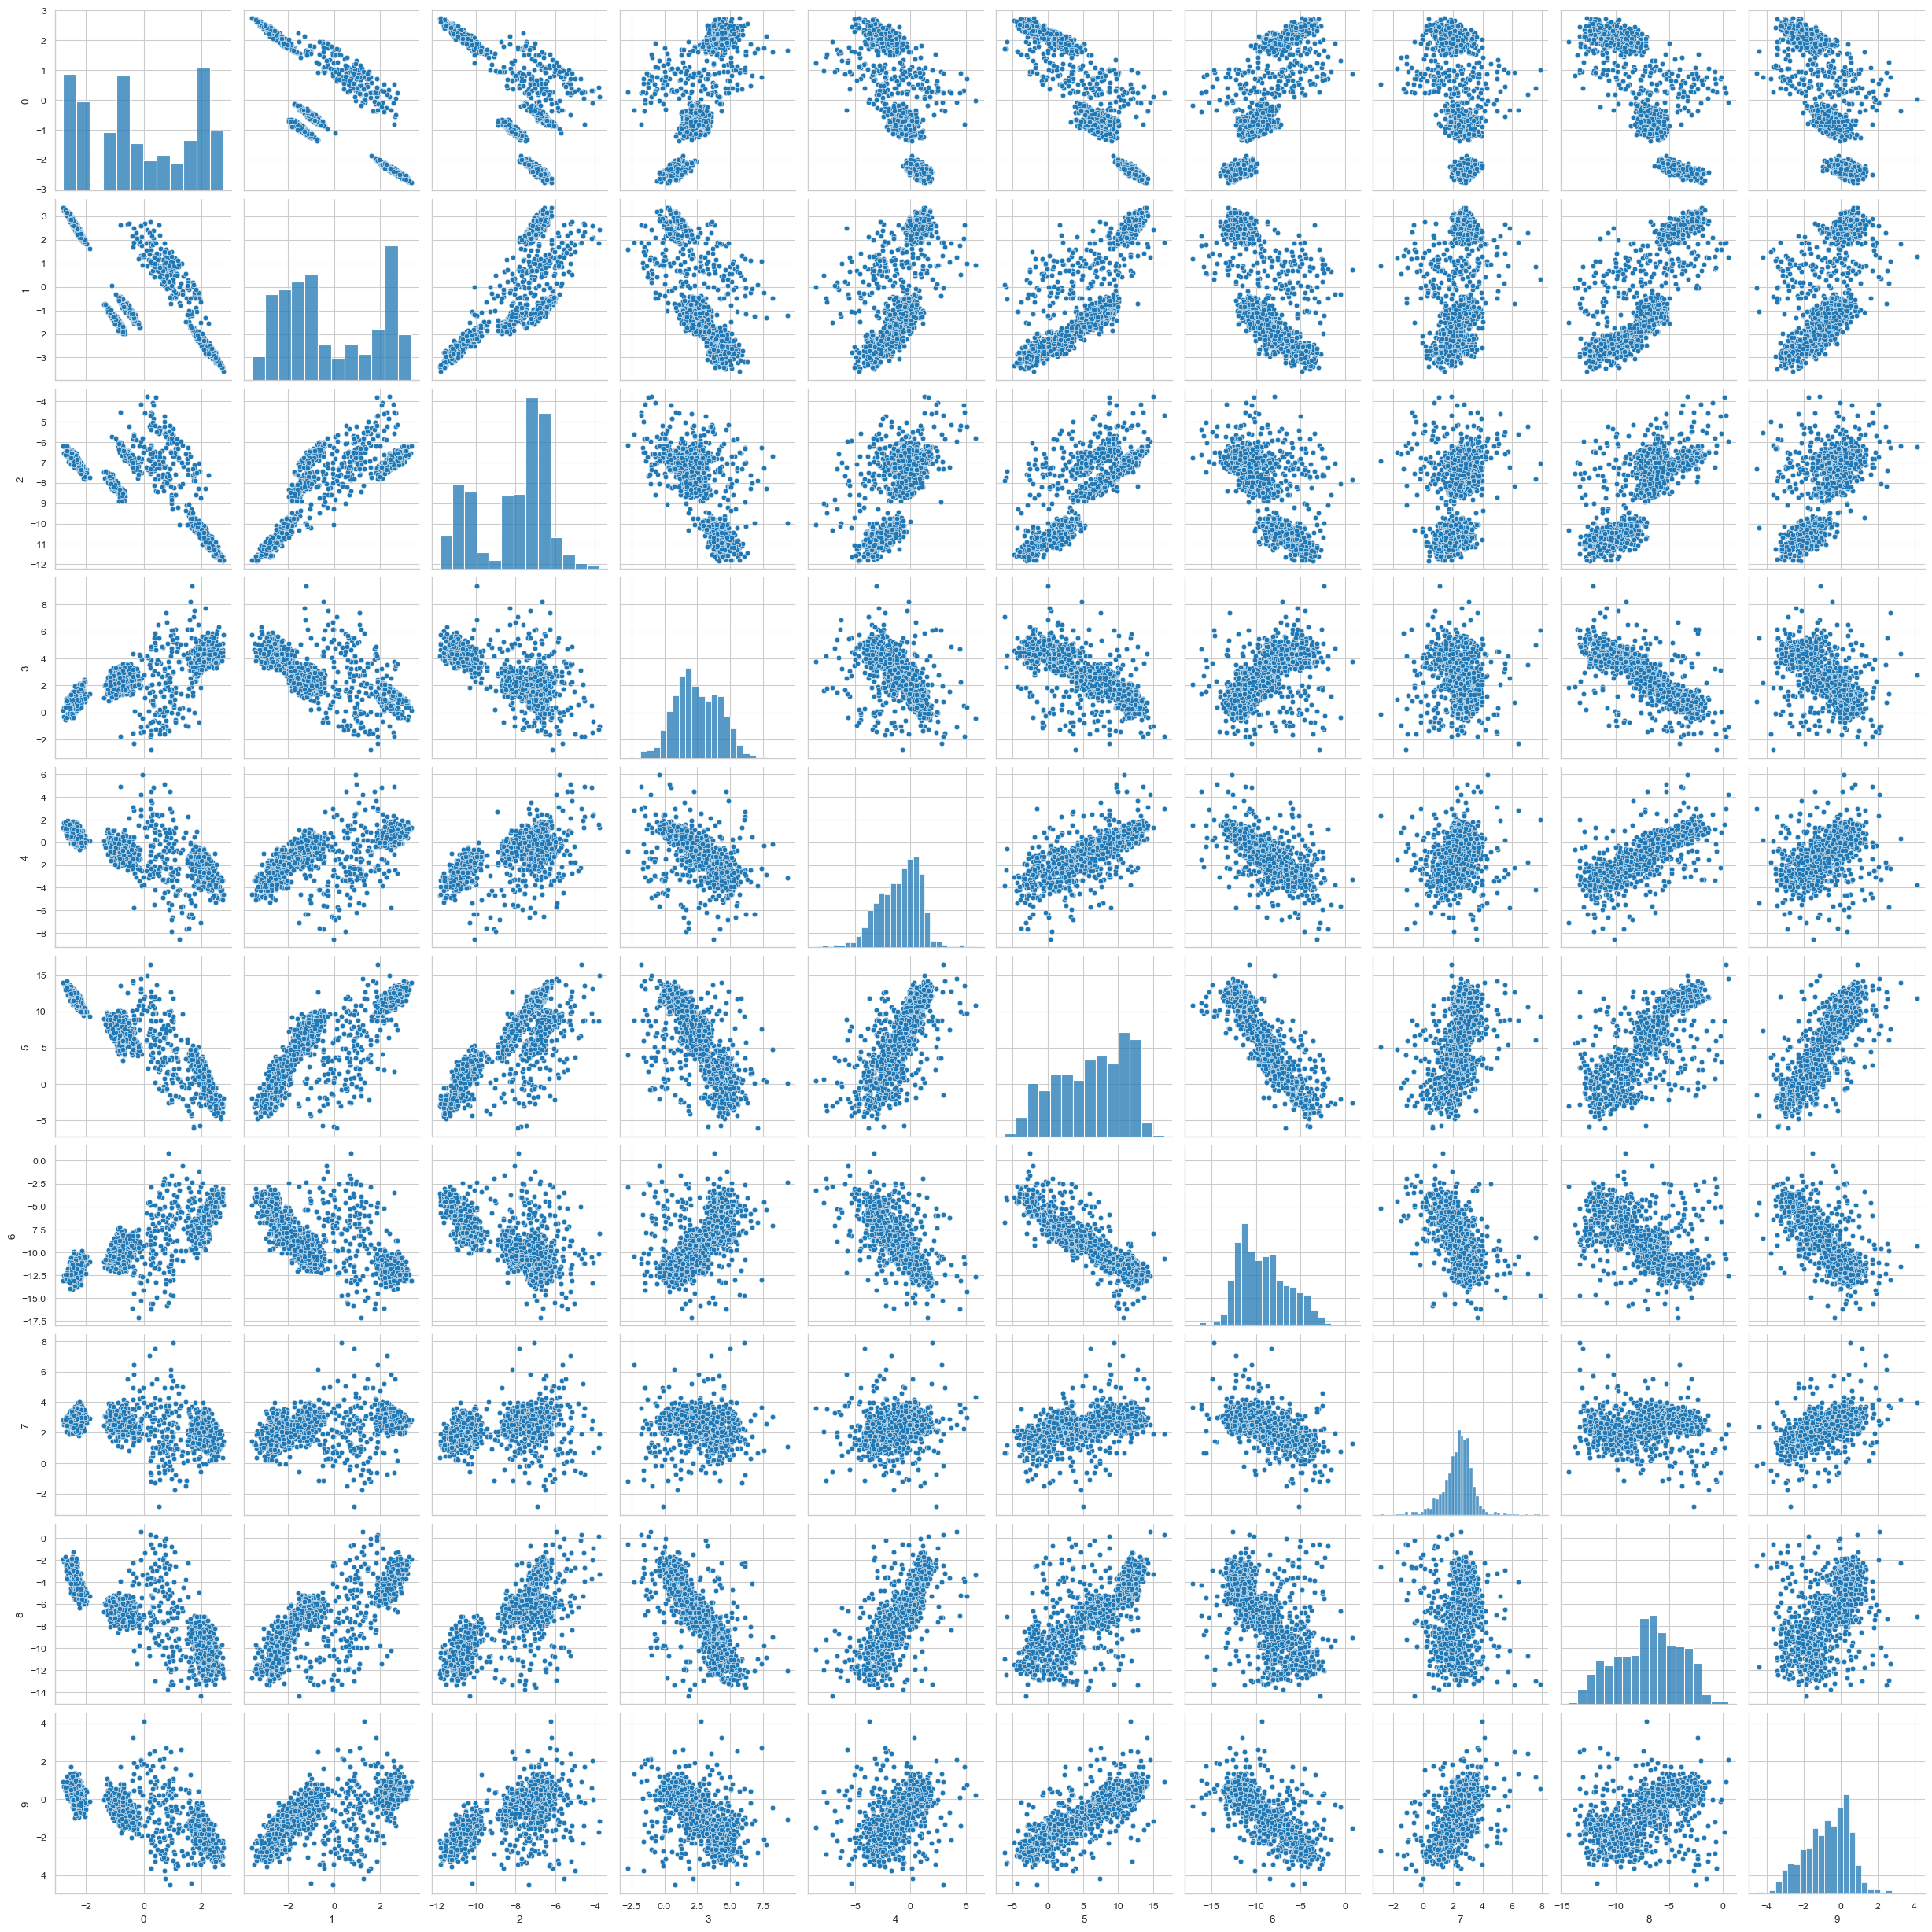

In [109]:
factor_scores = factor_analysis.transform(data)
sns.pairplot(pd.DataFrame(factor_scores))

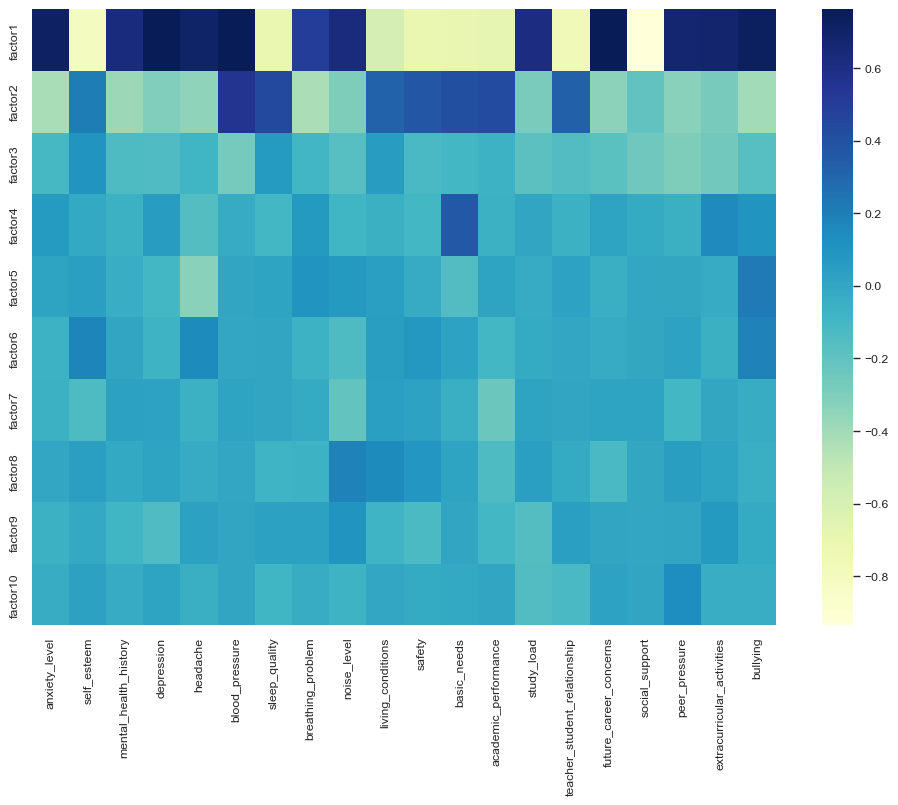

In [110]:
plt.figure(figsize=(12, 8))

sns.heatmap(factor_analysis.components_,
            cmap='YlGnBu',
            yticklabels=["factor" + str(x) for x in range(1, 11)],
            xticklabels=data.columns.tolist(),
            cbar_kws={"orientation": "vertical"}
            )
plt.show()

## PCA

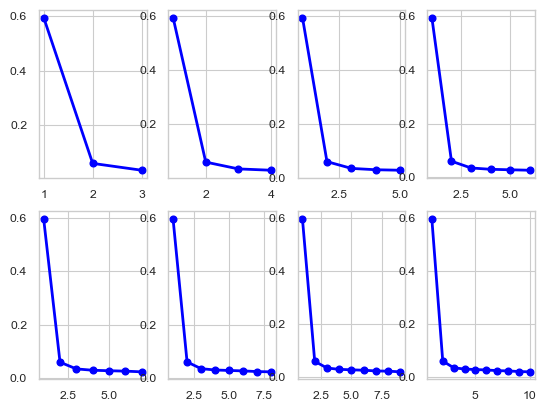

In [57]:
figure, axis = plt.subplots(2, 4) 

for i in range(3, 11):
    pca = PCA(n_components=i)
    components = pca.fit_transform(scaled_data)
    
    PC_values = np.arange(pca.n_components_) + 1
    axis[(i-3) // 4, (i-3) % 4].plot(
        PC_values, 
        pca.explained_variance_ratio_, 
        'o-', 
        linewidth=2, 
        color='blue'
    )

In [58]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)

In [62]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=stress)

for i, feature in enumerate(data.columns.tolist()):
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        axref="x", ayref="y",
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )

fig.update_layout(
    autosize=True
)
fig.show()

In [60]:
px.area(
    x=range(1, np.cumsum(pca.explained_variance_ratio_).shape[0] + 1),
    y=np.cumsum(pca.explained_variance_ratio_),
    labels={"x": "# Components", "y": "Explained Variance"}
)

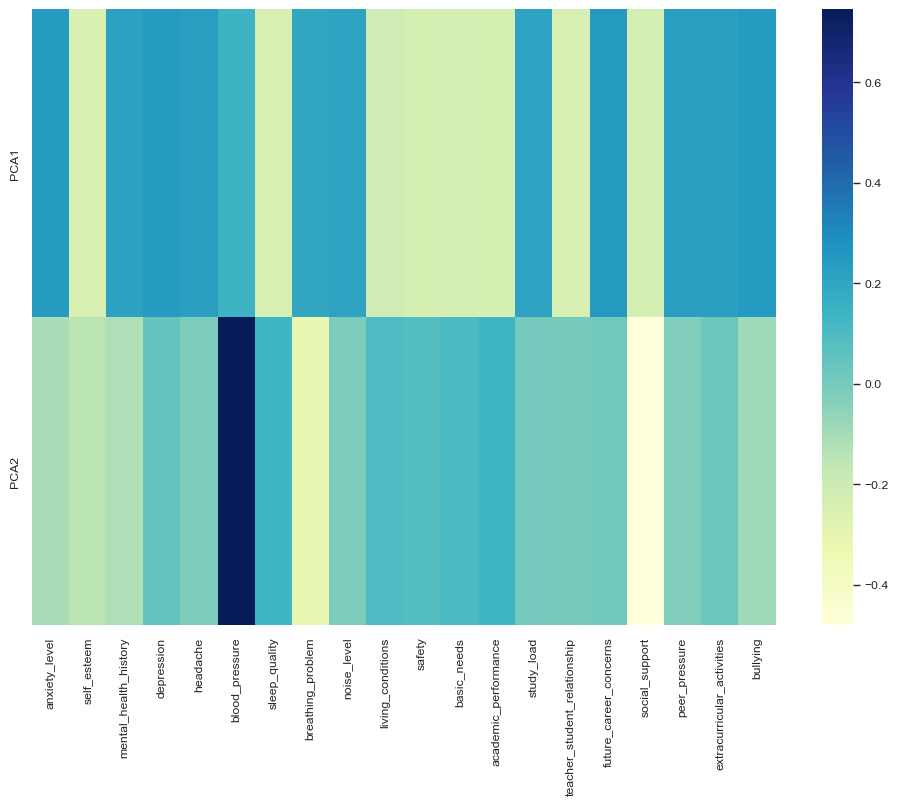

In [61]:
plt.figure(figsize=(12, 8))

sns.heatmap(pca.components_,
    cmap='YlGnBu',
    yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
    xticklabels=data.columns.tolist(),
    cbar_kws={"orientation": "vertical"}
)
plt.show()